# Customer Behaviour Analysis

# Objective
In this case study, you will be working on E-commerce Customer Behavior Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale e-commerce datasets using PySpark. You will apply techniques learned in data analytics to clean, transform, and explore customer behavior data, drawing meaningful insights to support business decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing customer segmentation, purchase patterns, and behavioral trends.

# Business Value
E-commerce businesses operate in a highly competitive market where understanding customer behavior is critical to driving growth and retention. To stay ahead, companies must leverage data-driven insights to optimize marketing strategies, personalize customer experiences, and improve product offerings. In this assignment, you will analyze e-commerce transaction data to uncover patterns in purchasing behavior, customer preferences, and sales performance. With Apache Spark's ability to handle large datasets efficiently, businesses can process vast amounts of customer interactions in real-time, helping them make faster and more informed decisions.
As an analyst at an e-commerce company, your task is to examine historical transaction records and customer survey data to derive actionable insights that can drive business growth. Your analysis will help identify high-value customers, segment users based on behavior, and uncover trends in product demand and customer engagement. By leveraging big data analytics, businesses can enhance customer satisfaction, improve retention rates, and maximize revenue opportunities.


# Assignment Tasks
1. Data Preparation
2. Data Cleaning
3. Exploratory Data Analysis
4. Customer Segmentation (RFM Analysis) and Business Insights
5. Evaluation and Conclusion


# Dataset Overview
The dataset can be accessed the following [link](https://drive.google.com/drive/folders/1mBgC5tvZrh1bIBvpXVP_j-au5LFUAwOZ?usp=sharing).

The dataset used in this analysis comprises longitudinal purchase records from 5,027 Amazon.com users in the United States, spanning 2018 to 2022.

It is structured into three CSV files (amazon-purchases.csv, survey.csv, and fields.csv) that capture transactional data, demographic profiles, and survey responses.

Collected with informed consent, the dataset enables analysis of customer behavior, product preferences, and demographic trends.

**NOTE**: Personal identifiers (PII) were removed to ensure privacy, and all data were preprocessed by users before submission.

`Data Dictionary:`

| **Attribute**          | **Description** |
|------------------------|----------------|
| **Order Dates**        | The specific dates when orders were placed, enabling chronological analysis of sales trends. |
| **Title** |The name of the product purchased. |
|**Category** | The classification or group to which the product belongs, facilitating category-wise analysis. |
| **Pricing** | The cost per unit of each product, essential for revenue calculations and pricing strategy assessments. |
| **Quantities** | The number of units of each product ordered in a transaction, aiding in inventory and demand analysis. |
| **Shipping States**    | The states to which products were shipped, useful for geographical sales distribution analysis. |
| **Survey ResponseID**  | A unique identifier linking purchases to customer survey responses, enabling correlation between purchasing behavior and customer feedback. |



# Loading the Datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Installing the libraries if required
!pip install --quiet pyspark==3.5.4 datasets==3.3.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 numpy==1.26.4 tqdm==4.67.1

In [3]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Initialise Spark session
spark = SparkSession.builder \
    .appName("Customer Behavior Analysis") \
    .getOrCreate()


# Load the paths to the datasets/csv files
amazon_purchases_path = "/content/drive/MyDrive/amazon-purchases.csv"
survey_path ="/content/drive/MyDrive/survey.csv"
fields_path ="/content/drive/MyDrive/fields.csv"

# Load datasets into PySpark DataFrames
amazon_purchases = spark.read.csv(amazon_purchases_path, header=True, inferSchema=True)
survey = spark.read.csv(survey_path, header=True, inferSchema=True)
fields = spark.read.csv(fields_path, header=True, inferSchema=True)

# Merge the datasets
merged_data =amazon_purchases.join(survey, on="Survey ResponseID", how="left")

# Display the merged data
merged_data.printSchema()
merged_data.show(5)

root
 |-- Survey ResponseID: string (nullable = true)
 |-- Order Date: date (nullable = true)
 |-- Purchase Price Per Unit: double (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Shipping Address State: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ASIN/ISBN (Product Code): string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Q-demos-age: string (nullable = true)
 |-- Q-demos-hispanic: string (nullable = true)
 |-- Q-demos-race: string (nullable = true)
 |-- Q-demos-education: string (nullable = true)
 |-- Q-demos-income: string (nullable = true)
 |-- Q-demos-gender: string (nullable = true)
 |-- Q-sexual-orientation: string (nullable = true)
 |-- Q-demos-state: string (nullable = true)
 |-- Q-amazon-use-howmany: string (nullable = true)
 |-- Q-amazon-use-hh-size: string (nullable = true)
 |-- Q-amazon-use-how-oft: string (nullable = true)
 |-- Q-substance-use-cigarettes: string (nullable = true)
 |-- Q-substance-use-marijuana: strin

#1. Data Preparation

Before analysis, the data needs to be prepared to ensure consistency and efficiency.
- Check for data consistency and ensure all columns are correctly formatted.
- Structure and prepare the dataset for further processing, ensuring that relevant features are retained


In [4]:
from pyspark.sql.functions import sum as spark_sum, col

# Check for missing values in the merged dataset
missing_values = merged_data.select(
    [(spark_sum(col(c).isNull().cast("int")).alias(c)) for c in merged_data.columns]
)

# Show missing value counts per column
missing_values.show()

+-----------------+----------+-----------------------+--------+----------------------+-----+------------------------+--------+-----------+----------------+------------+-----------------+--------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|Title|ASIN/ISBN (Product Code)|Category|Q-demos-age|Q-demos-hispanic|Q-demos-race|Q-demos-education|Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-personal-diabetes|Q-personal-wheelchair|Q-life-changes|Q-sell-YOUR-data|

#2. Data Cleaning <font color = red>[20 marks]</font> <br>

Prepare the data for further analysis by performing data cleaning such as missing value treatment, handle data schema, outlier analysis, and relevant feature engineering techniques.

## 2.1 Handling Missing values <font color = red>[10 marks]</font> <br>
Handle missing values in the data

In [5]:
# Import necessary functions
from pyspark.sql.functions import when, isnull, count, col, sum as spark_sum

# Fill missing (null) values with the appropriate techniques as required by the analysis

# Aggregate and count missing values (nulls) for each column after replacement

# Display the count of remaining missing values in each column


In [6]:
# Your code here
# Step 1: Fill missing values
# Replace missing values in categorical columns with 'Unknown'
filled_data = merged_data.fillna({
    "Category": "Unknown",
    "Title": "Unknown",
    "Shipping address state": "Unknown"
})

# Replace missing numeric values with 0 or appropriate value (based on context)
filled_data = filled_data.fillna({
    "Purchase price per unit": 0,
    "Quantity": 0
})

# Step 2: Aggregate and count missing (null) values for each column
null_counts = filled_data.select([
    spark_sum(col(c).isNull().cast("int")).alias(c) for c in filled_data.columns
])

# Step 3: Display the count of remaining missing values
null_counts.show(truncate=False)

+-----------------+----------+-----------------------+--------+----------------------+-----+------------------------+--------+-----------+----------------+------------+-----------------+--------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|Survey ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|Title|ASIN/ISBN (Product Code)|Category|Q-demos-age|Q-demos-hispanic|Q-demos-race|Q-demos-education|Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-personal-diabetes|Q-personal-wheelchair|Q-life-changes|Q-sell-YOUR-data|

## 2.2 Feature Engineering <font color = red>[5 marks]</font> <br>
Perform feature engineering on the dataset to extract relevant/ create new features as required and map specific data types.

In [7]:
from pyspark.sql.functions import col, month, year, to_date

# Perform appropriate feature engineering. Eg. Extract order date, month, year and cast to the appropriate values

# Display the updated dataset
# Step 1: Convert Order Date to DateType if it's not already
# You may need to update the column name based on your dataset
filled_data = filled_data.withColumn("Order date", to_date(col("Order date"), "yyyy-MM-dd"))

# Step 2: Extract Month and Year from Order Date
filled_data = filled_data.withColumn("Order_Year", year(col("Order date"))) \
                         .withColumn("Order_Month", month(col("Order date")))

# Optional: Cast numeric columns to correct types if not already
filled_data = filled_data.withColumn("Purchase price per unit", col("Purchase price per unit").cast("double")) \
                         .withColumn("Quantity", col("Quantity").cast("int"))

# Step 3: Display the updated dataset with new features
filled_data.select("Order date", "Order_Year", "Order_Month", "Purchase price per unit", "Quantity").show(10)

+----------+----------+-----------+-----------------------+--------+
|Order date|Order_Year|Order_Month|Purchase price per unit|Quantity|
+----------+----------+-----------+-----------------------+--------+
|2018-12-04|      2018|         12|                   7.98|       1|
|2018-12-22|      2018|         12|                  13.99|       1|
|2018-12-24|      2018|         12|                   8.99|       1|
|2018-12-25|      2018|         12|                  10.45|       1|
|2018-12-25|      2018|         12|                   10.0|       1|
|2019-02-18|      2019|          2|                  10.99|       1|
|2019-02-18|      2019|          2|                   4.99|       1|
|2019-03-15|      2019|          3|                 124.99|       1|
|2019-04-23|      2019|          4|                  12.99|       1|
|2019-04-23|      2019|          4|                  24.69|       1|
+----------+----------+-----------+-----------------------+--------+
only showing top 10 rows



In [8]:
from pyspark.sql.functions import create_map, lit
from itertools import chain

# Map categorical income to numerical values
income_mapping = {
    'Less than $25,000': 0,
    '$25,000 - $49,999': 1,
    '$50,000 - $74,999': 2,
    '$75,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000 or more': 5,
    'Prefer not to say' : 6
}


# Map gender to numerical values
gender_mapping = {
    'Male': 1,
    'Female': 0,
    'Other': 2,
    'Prefer not to say' : 3
}

# Ensure both 'Q-demos-gender' and 'income' columns are of string type
# Use 'Q-demos-gender' instead of 'gender' and "Q-demos-income" instead of "income"
filled_data = filled_data.withColumn("Q-demos-gender", filled_data["Q-demos-gender"].cast("string"))
filled_data = filled_data.withColumn("Q-demos-income", filled_data["Q-demos-income"].cast("string")) # Changed "income" to "Q-demos-income"

# Create mapping expressions for gender and income
gender_expr = create_map([lit(x) for x in chain(*gender_mapping.items())])
income_expr = create_map([lit(x) for x in chain(*income_mapping.items())])

# Apply the mapping expressions to the respective columns
# Use 'Q-demos-gender' instead of 'gender' and "Q-demos-income" instead of "income"
filled_data = filled_data.withColumn("gender", gender_expr.getItem(col("Q-demos-gender")))
filled_data = filled_data.withColumn("income", income_expr.getItem(col("Q-demos-income"))) # Changed "income" to "Q-demos-income"

filled_data.show(5)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/column.py:460: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+----------+-----------+------+------+
|Survey ResponseID|Order date|Purchase price per unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|     Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-m

## 2.3 Data Cleaning <font color = red>[5 marks]</font> <br>
Handle data cleaning techniques such as data duplication, dropping unnecessary values etc.

In [9]:
# Check for duplicates
print("Number of Duplicates:", filled_data.count() - filled_data.dropDuplicates().count())

# Remove duplicates
merged_data = filled_data.dropDuplicates()

# Verify duplicates after cleaning
print("Number of Duplicates After Cleaning:", merged_data.count() - merged_data.dropDuplicates().count())

Number of Duplicates: 11695
Number of Duplicates After Cleaning: 0


In [10]:
cleaned_data_path ="/mnt/data/cleaned_amazon_data"   # Save the cleaned dataset locally
merged_data.write.csv(cleaned_data_path, header=True, mode='overwrite')

# Load the cleaned dataset from the location
cleaned_data = spark.read.csv(cleaned_data_path, header=True, inferSchema=True)

# Display the first few rows
print("Cleaned Data:")
cleaned_data.show(5)

Cleaned Data:
+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+----------------+-------------+----------------+------------------+--------------------+-------------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------------+--------------------+--------------------+---------------+------------+------------------+----------+-----------+------+------+
|Survey ResponseID|Order date|Purchase price per unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|        Category|  Q-demos-age|Q-demos-hispanic|      Q-demos-race|   Q-demos-education|     Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-

# 3. Exploratory Data Analysis <font color = red>[55 marks]</font> <br>

## 3.1 Analyse purchases by hour, day and month <font color = red>[5 marks]</font> <br>

Examine overall trends in purchases over time and analyse the trends by hour, day, month.

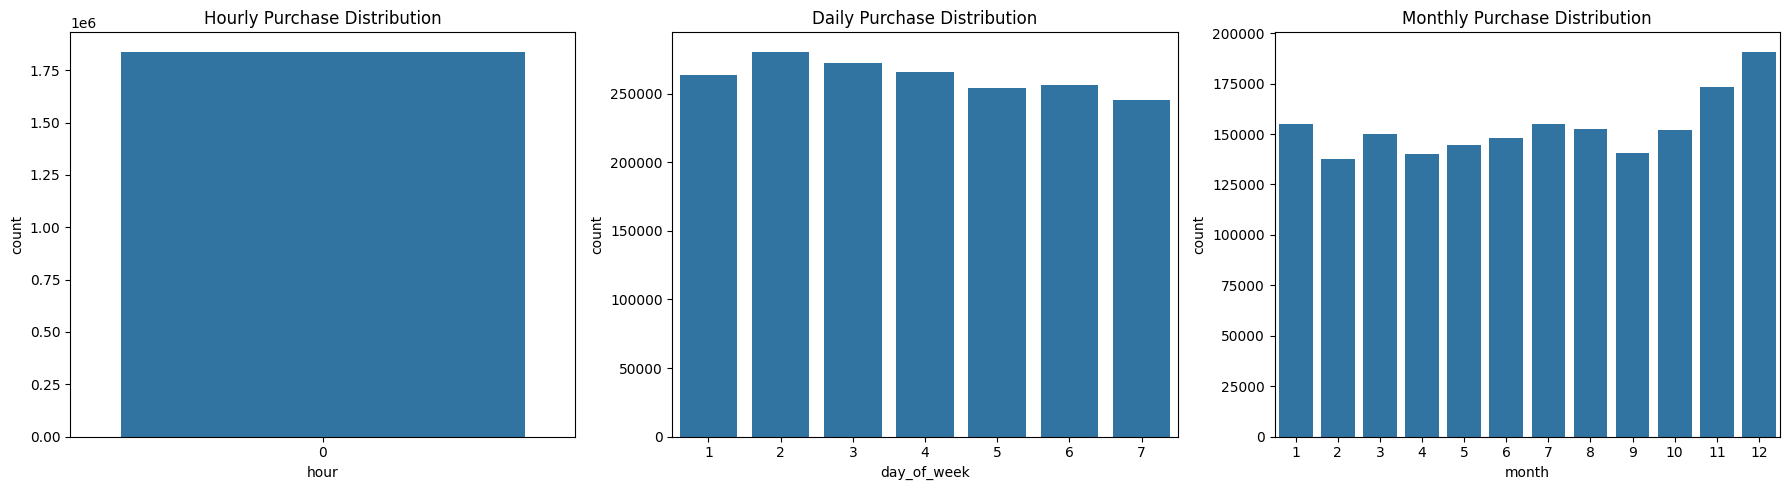

In [12]:
# Purchase Distribution by Hour, Day, and Month
from pyspark.sql.functions import hour, dayofweek, month
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour, day, and month
# Use "Order date" (with space) instead of "order_date"
cleaned_data = cleaned_data.withColumn("hour", hour(col("Order date")))
cleaned_data = cleaned_data.withColumn("day_of_week", dayofweek(col("Order date")))
cleaned_data = cleaned_data.withColumn("month", month(col("Order date")))

# Group and count purchases by time factors
hourly_purchases = cleaned_data.groupBy("hour").count()
daily_purchases = cleaned_data.groupBy("day_of_week").count()
monthly_purchases = cleaned_data.groupBy("month").count()

# Convert to Pandas for visualisation
hourly_purchases_pd = hourly_purchases.toPandas()
daily_purchases_pd = daily_purchases.toPandas()
monthly_purchases_pd = monthly_purchases.toPandas()

# Plot the data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='hour', y='count', data=hourly_purchases_pd, ax=axes[0])
axes[0].set_title('Hourly Purchase Distribution')

sns.barplot(x='day_of_week', y='count', data=daily_purchases_pd, ax=axes[1])
axes[1].set_title('Daily Purchase Distribution')

sns.barplot(x='month', y='count', data=monthly_purchases_pd, ax=axes[2])
axes[2].set_title('Monthly Purchase Distribution')

plt.tight_layout()
plt.show()

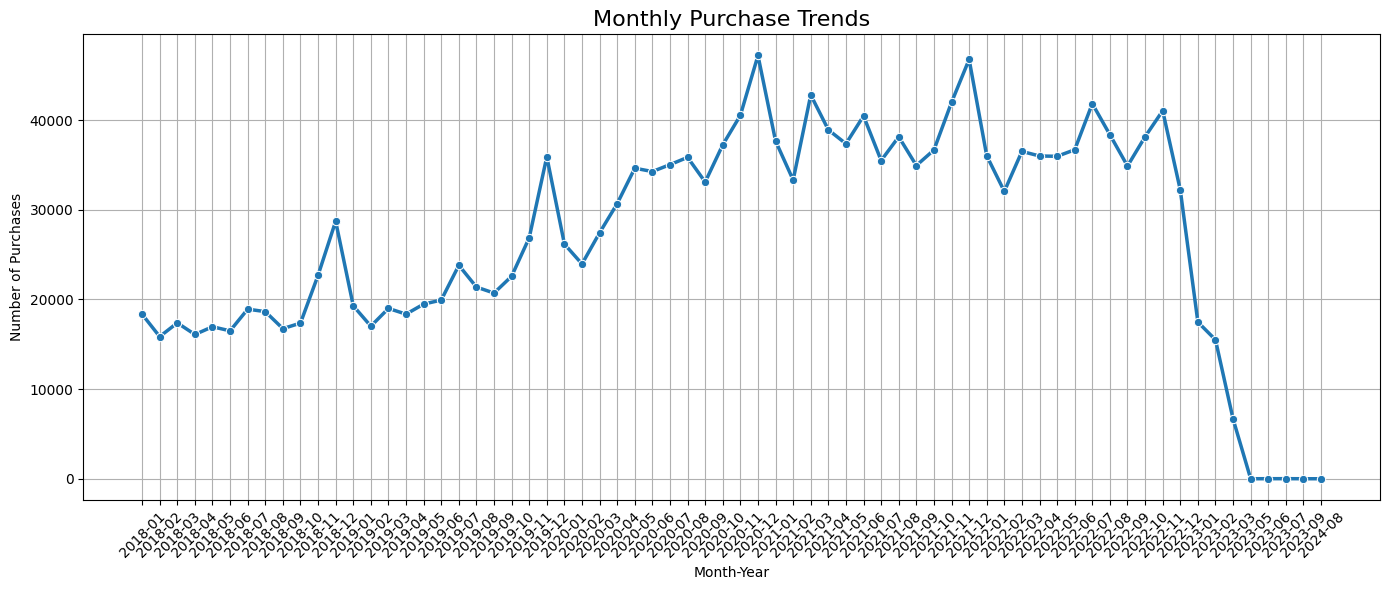

In [13]:
# Monthly Purchase Trends

from pyspark.sql.functions import date_format
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month and year from 'Order Date'
monthly_trends = cleaned_data.withColumn("Month_Year", date_format("Order date", "yyyy-MM"))

# Group by month and count purchases
monthly_counts = monthly_trends.groupBy("Month_Year").count().orderBy("Month_Year")

# Convert to Pandas for visualisation
monthly_df = monthly_counts.toPandas()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_df, x="Month_Year", y="count", marker="o", linewidth=2.5)
plt.title("Monthly Purchase Trends", fontsize=16)
plt.xlabel("Month-Year")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-14-31cf1e0d491a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_df, x="Year", y="count", palette="magma")


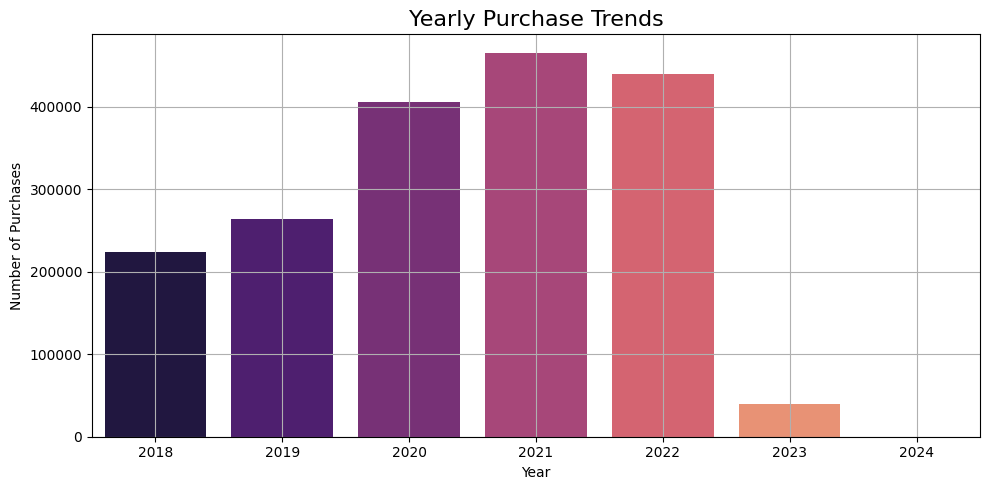

In [14]:
# Yealy Purchase Trends

from pyspark.sql.functions import date_format

# Extract Year from 'Order date'
yearly_data = cleaned_data.withColumn("Year", date_format("Order date", "yyyy"))

# Group by Year and count purchases
yearly_counts = yearly_data.groupBy("Year").count().orderBy("Year")

# Convert to Pandas for visualisation
yearly_df = yearly_counts.toPandas()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_df, x="Year", y="count", palette="magma")
plt.title("Yearly Purchase Trends", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2 Customer Demographics vs Purchase Frequency <font color = red>[5 marks]</font> <br>
Analyse the trends between the customer deographics and the purchase frequency

<ipython-input-15-0f0462170ba3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchase_counts_pd, x=demographic_group, y="purchase_count", palette="Blues_d")


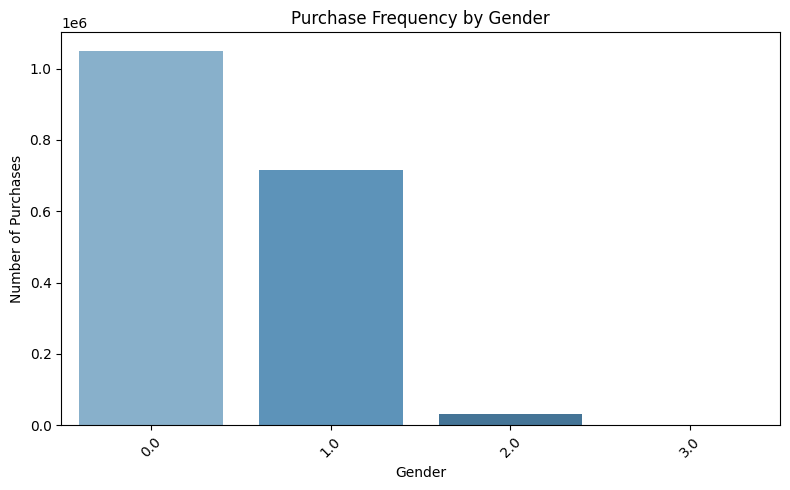

In [15]:
# Correlation Between Demographics and Purchase Frequency

from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns

# Group by demographic attributes and count purchases
demographic_group = "Gender"  # Replace with other attributes like 'Age', 'Income' etc.
purchase_counts = merged_data.groupBy(demographic_group).agg(count("*").alias("purchase_count"))

# Convert to Pandas for visualisation
purchase_counts_pd = purchase_counts.toPandas().sort_values("purchase_count", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=purchase_counts_pd, x=demographic_group, y="purchase_count", palette="Blues_d")
plt.title(f"Purchase Frequency by {demographic_group}")
plt.xlabel(demographic_group)
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.3 Purchase behavior weekend vs weekday <font color = red>[5 marks]</font> <br>

Compare the purchase behavior of customer's on weekdays vs. weekends.

<ipython-input-17-e081f580a5ff>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchase_by_daytype_pd, x="DayType", y="purchase_count", palette="Set2")


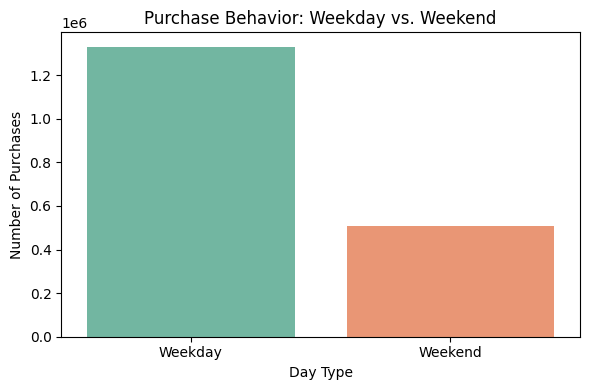

In [17]:
# Weekday vs. Weekend Purchase Behavior

from pyspark.sql.functions import dayofweek, when, count
import matplotlib.pyplot as plt
import seaborn as sns

# Use "Order date" (with space) instead of "Order_Date"
merged_data = merged_data.withColumn("DayOfWeek", dayofweek("Order date"))

# Define weekdays and weekends
merged_data = merged_data.withColumn(
    "DayType",
    when(col("DayOfWeek").isin(1, 7), "Weekend").otherwise("Weekday")
)

# Group and count purchases
purchase_by_daytype = merged_data.groupBy("DayType").agg(count("*").alias("purchase_count"))

# Convert to Pandas for visualisation
purchase_by_daytype_pd = purchase_by_daytype.toPandas()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=purchase_by_daytype_pd, x="DayType", y="purchase_count", palette="Set2")
plt.title("Purchase Behavior: Weekday vs. Weekend")
plt.xlabel("Day Type")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

## 3.4 Frequently purchased product pairs <font color = red>[5 marks]</font> <br>

Analyze how frequently products are purchased together (also known as Market Basket Analysis)


<ipython-input-21-b767c077cd4f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pairs_pd, x="pair_count", y=top_pairs_pd["item1"] + " & " + top_pairs_pd["item2"], palette="magma")
<ipython-input-21-b767c077cd4f>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


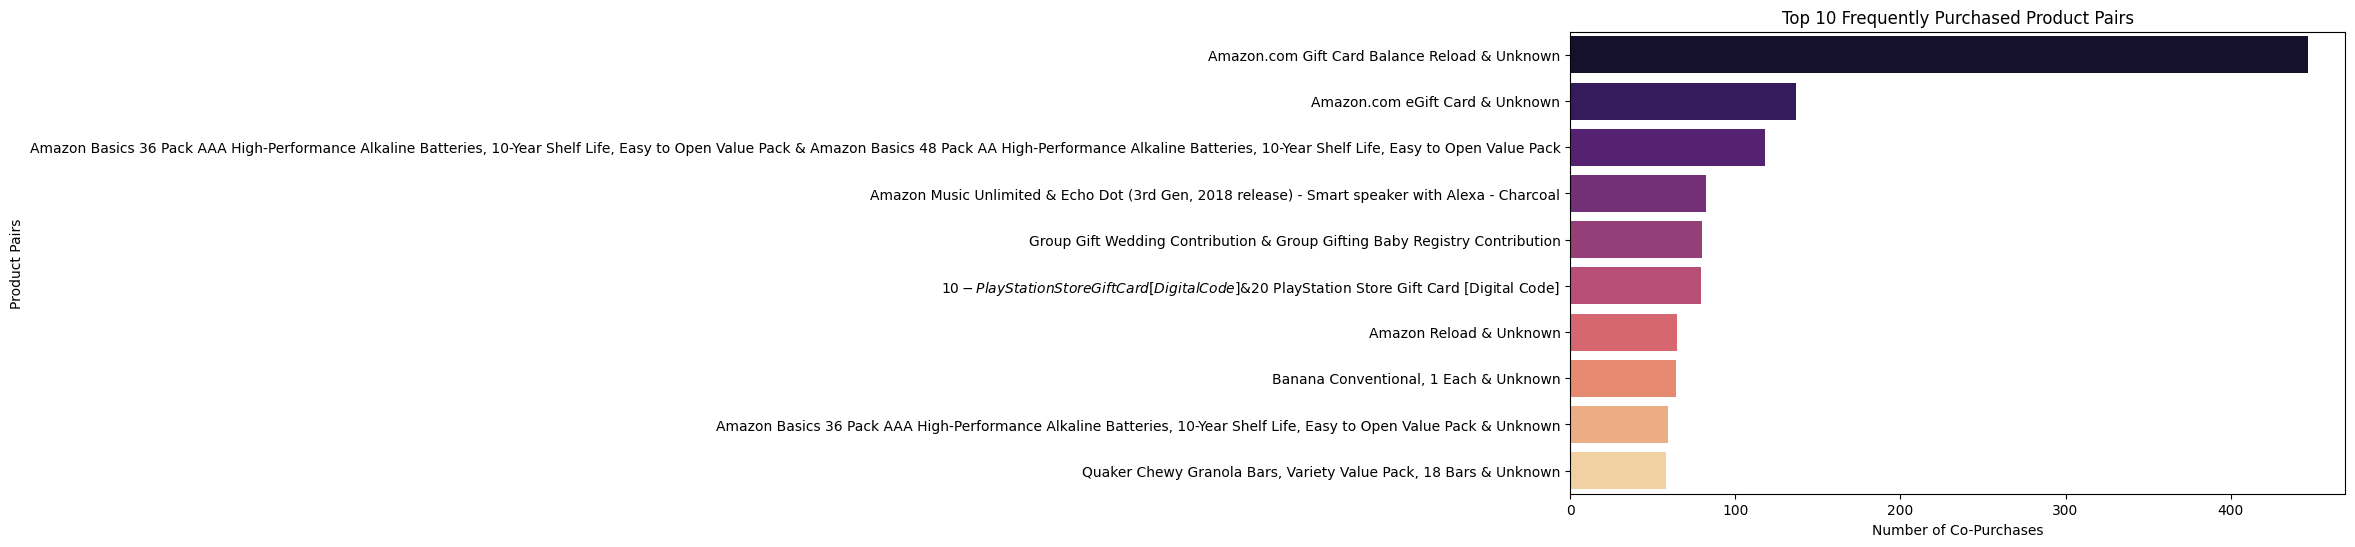

In [21]:
# Frequently Purchased Product Pairs (Market Basket Analysis)

from pyspark.sql.functions import collect_set, explode, col, count, lit, array
from pyspark.sql import Row
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Group purchases by customer and collect items bought together
# Use 'Order date' instead of 'Order_Date'
baskets = merged_data.groupBy("Survey ResponseID", "Order date") \
                     .agg(collect_set("Title").alias("items"))

# Generate all unique product pairs (combinations of 2 items)
def generate_pairs(item_list):
    return list(combinations(sorted(item_list), 2))

# Register as UDF
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StructType, StructField, StringType

pair_schema = ArrayType(StructType([
    StructField("item1", StringType(), True),
    StructField("item2", StringType(), True),
]))

@udf(pair_schema)
def generate_pairs_udf(items):
    return [{"item1": a, "item2": b} for a, b in combinations(sorted(items), 2)] if len(items) > 1 else []

#Apply UDF to generate pairs
baskets_with_pairs = baskets.withColumn("item_pairs", generate_pairs_udf(col("items")))

# Explode item pairs
exploded_pairs = baskets_with_pairs.select(explode("item_pairs").alias("pair"))
pairs_flat = exploded_pairs.select(col("pair.item1"), col("pair.item2"))

# Count co-occurrences of items
pair_counts = pairs_flat.groupBy("item1", "item2").agg(count("*").alias("pair_count"))

# Get top N frequent pairs (e.g., top 10)
top_pairs = pair_counts.orderBy(col("pair_count").desc()).limit(10)

# Convert to Pandas for visualisation
top_pairs_pd = top_pairs.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_pairs_pd, x="pair_count", y=top_pairs_pd["item1"] + " & " + top_pairs_pd["item2"], palette="magma")
plt.title("Top 10 Frequently Purchased Product Pairs")
plt.xlabel("Number of Co-Purchases")
plt.ylabel("Product Pairs")
plt.tight_layout()
plt.show()

## 3.5 Examine Product Performance <font color = red>[5 marks]</font> <br>

Examine the performance of products by calculating revenue and item popularity.

<ipython-input-23-bccba4a123a0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_pd, x="Total_Revenue", y="Category", palette="viridis")


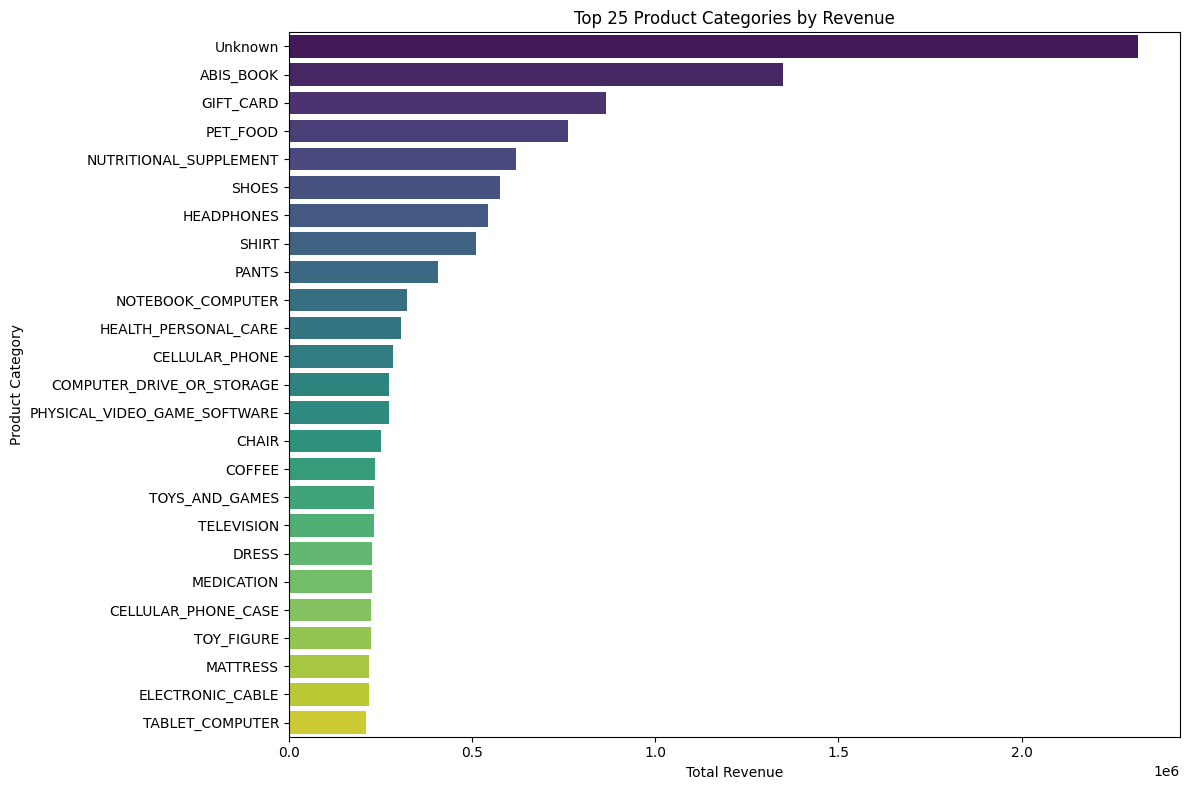

In [23]:
# Contribution of Product Categories (Top 25)
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Create Revenue column (Price × Quantity)
# Use "Purchase price per unit" instead of "Price"
merged_data = merged_data.withColumn("Revenue", col("Purchase price per unit") * col("Quantity"))

# Group by Category and calculate total revenue
category_perf = merged_data.groupBy("Category") \
    .agg(spark_sum("Revenue").alias("Total_Revenue"))

# Get top 25 categories by revenue
top_25_categories = category_perf.orderBy(col("Total_Revenue").desc()).limit(25)

# Convert to Pandas for visualisation
top_25_pd = top_25_categories.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_pd, x="Total_Revenue", y="Category", palette="viridis")
plt.title("Top 25 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

## 3.6 Top products by quantity <font color = red>[5 marks]</font> <br>

Identify the most frequently purchased products.

<ipython-input-24-1757b3513d9a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_qty_pd, x="Total_Quantity", y="Title", palette="crest")


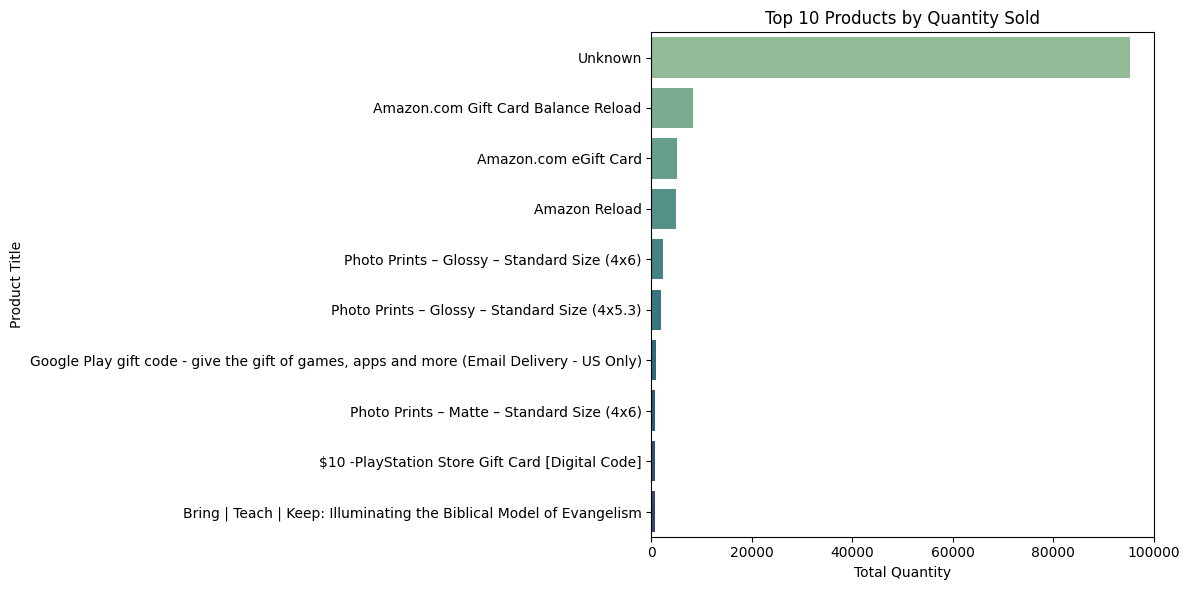

In [24]:
# Top 10 Products by Quantity
from pyspark.sql.functions import sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product title and sum 'Quantity'
top_products_qty = merged_data.groupBy("Title") \
    .agg(spark_sum("Quantity").alias("Total_Quantity")) \
    .orderBy(col("Total_Quantity").desc()) \
    .limit(10)

# Convert to Pandas for visualisation
top_products_qty_pd = top_products_qty.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_qty_pd, x="Total_Quantity", y="Title", palette="crest")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

## 3.7 Distribution of Purchases by State <font color = red>[5 marks]</font> <br>

Analyze the distribution of purchases across states and categories.

<ipython-input-26-93e37c653074>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_distribution_pd, x="Total_Purchases", y="Shipping Address State", palette="flare") # Update the y-axis label


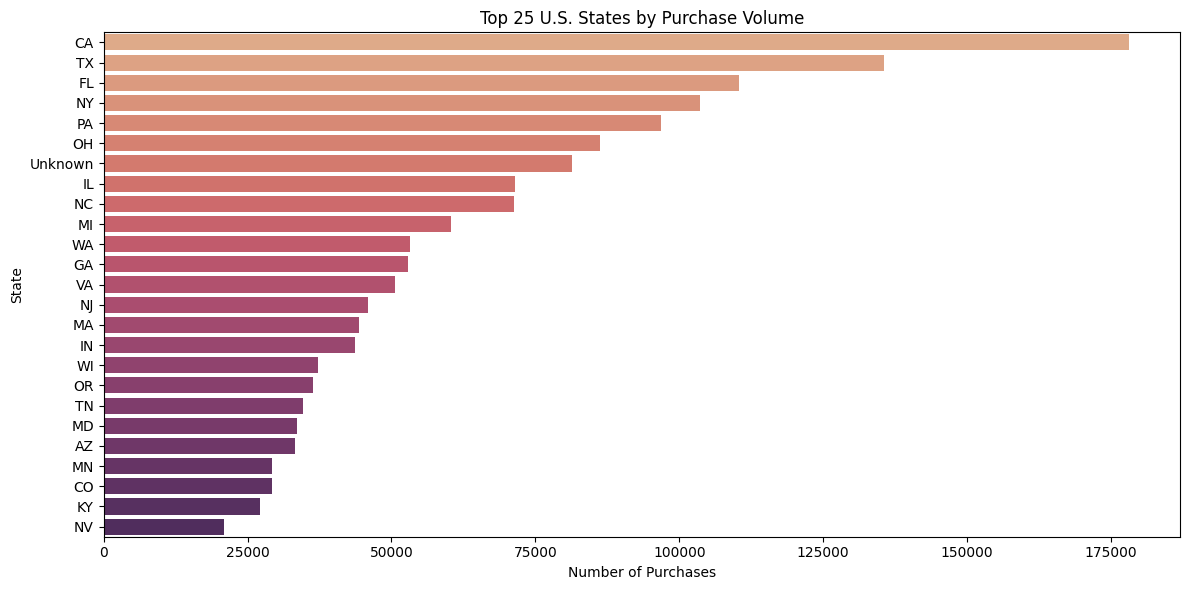

In [26]:
# Distribution of Purchases by State (Top 25)
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and count purchases
# Use "Shipping Address State" instead of "Shipping_State"
state_distribution = merged_data.groupBy("Shipping Address State") \
    .agg(count("*").alias("Total_Purchases")) \
    .orderBy(col("Total_Purchases").desc()) \
    .limit(25)

# Convert to Pandas for visualisation
state_distribution_pd = state_distribution.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=state_distribution_pd, x="Total_Purchases", y="Shipping Address State", palette="flare") # Update the y-axis label
plt.title("Top 25 U.S. States by Purchase Volume")
plt.xlabel("Number of Purchases")
plt.ylabel("State")
plt.tight_layout()
plt.show()

## 3.8 Price vs Product Quantity <font color = red>[5 marks]</font> <br>

Identify the Relationship between Price and Quantity

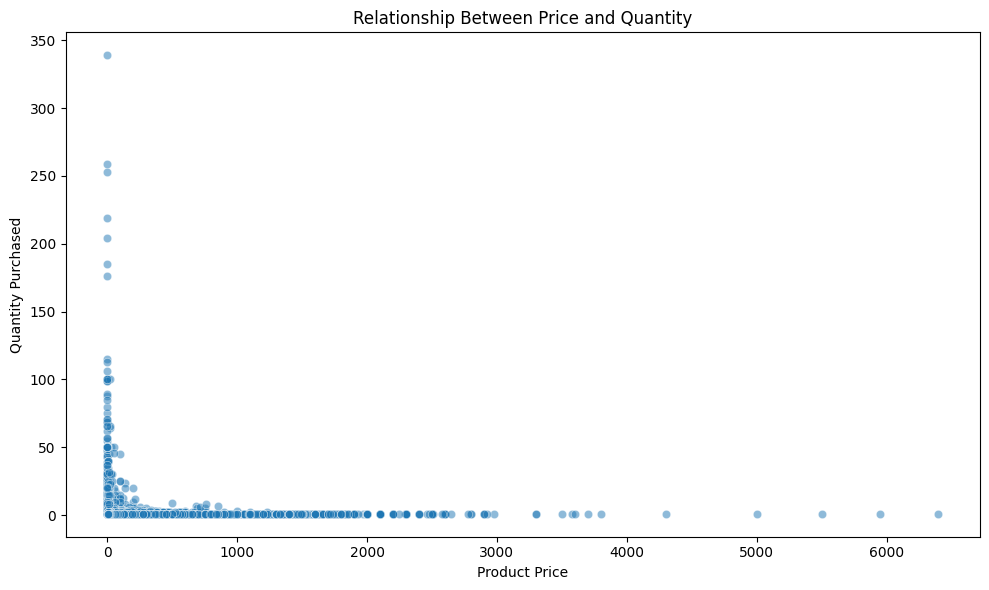

In [28]:
# Relationship Between Price and Quantity
import matplotlib.pyplot as plt
import seaborn as sns

# Select 'Purchase price per unit' and Quantity columns
price_quantity = merged_data.select("Purchase price per unit", "Quantity")

# Convert to Pandas for visualisation
price_quantity_pd = price_quantity.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_quantity_pd, x="Purchase price per unit", y="Quantity", alpha=0.5)  # Update x-axis label
plt.title("Relationship Between Price and Quantity")
plt.xlabel("Product Price")
plt.ylabel("Quantity Purchased")
plt.tight_layout()
plt.show()

## 3.9 Analyse the spending KPIs <font color = red>[5 marks]</font> <br>


A popular KPI is average spend per customer. Calculate this metric as the ratio of total transaction amount from non-recurring payments divided by the total number of customers who made a purchase

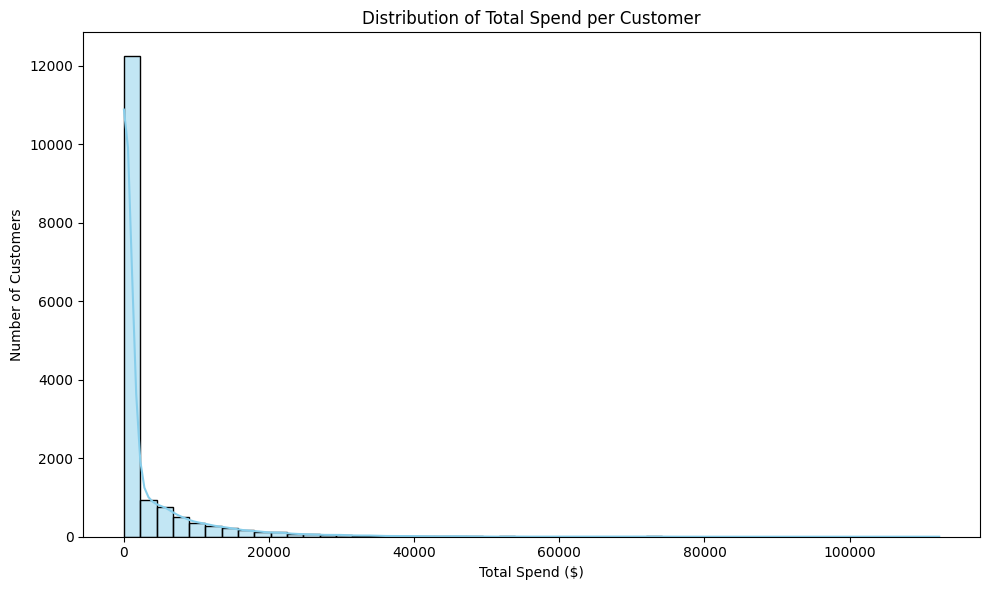

In [30]:
# Average Spend per Customer

from pyspark.sql.functions import col, sum as spark_sum, avg
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Revenue column exists
# Use "Purchase price per unit" instead of "Price"
merged_data = merged_data.withColumn("Revenue", col("Purchase price per unit") * col("Quantity"))

# Group by customer and calculate average spend
customer_spending = merged_data.groupBy("Survey ResponseID") \
    .agg(
        spark_sum("Revenue").alias("Total_Spend"),
        avg("Revenue").alias("Avg_Spend_per_Transaction")
    )

# Convert to Pandas for visualisation
customer_spending_pd = customer_spending.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending_pd["Total_Spend"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Total Spend per Customer")
plt.xlabel("Total Spend ($)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

Analyse the Repeat Purchase Behavior of Customers

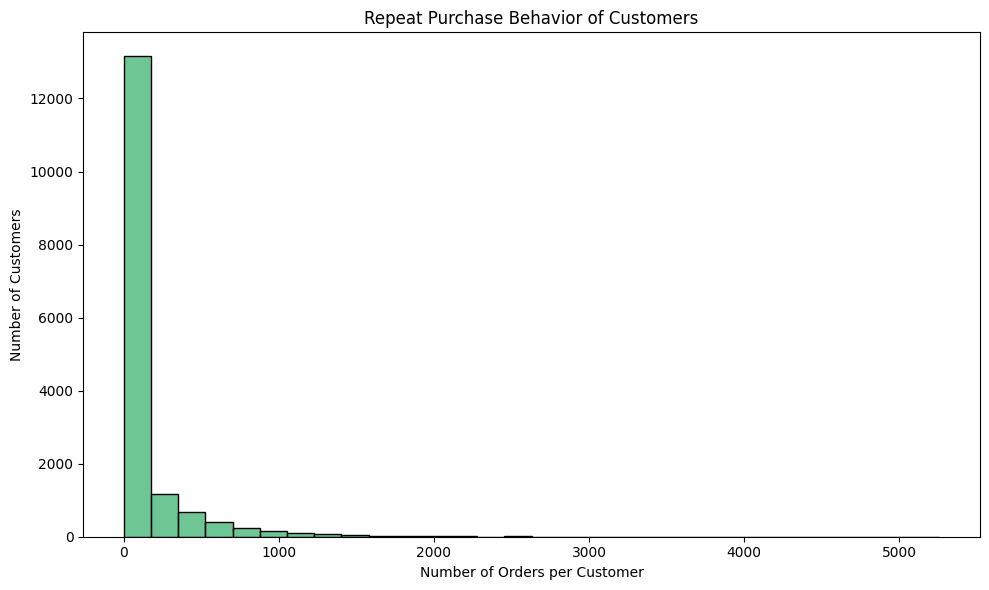

In [31]:
# Repeat Purchase Analysis Behavior Per Customers
from pyspark.sql.functions import count, countDistinct
import matplotlib.pyplot as plt
import seaborn as sns

# Count purchases per customer
repeat_purchase_df = merged_data.groupBy("Survey ResponseID") \
    .agg(count("*").alias("Total_Orders"))

# Convert to Pandas for visualisation
repeat_purchase_pd = repeat_purchase_df.toPandas()

# Plot repeat purchase distribution
plt.figure(figsize=(10, 6))
sns.histplot(repeat_purchase_pd["Total_Orders"], bins=30, kde=False, color="mediumseagreen")
plt.title("Repeat Purchase Behavior of Customers")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

Analyse the top 10 high-engagement customers

<ipython-input-33-bb50d4eb0f0f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_customers_pd, x="Survey ResponseID", y="Total_Spend", palette="viridis")


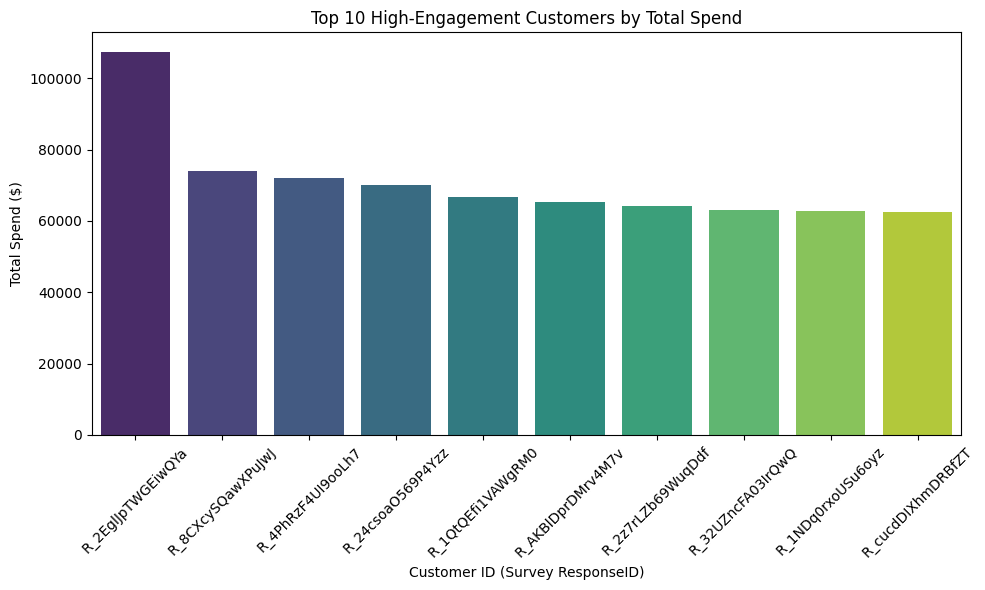

In [33]:
# Top 10 High-Engagement Customers
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate total spend and purchase frequency for each customer
# Use "Purchase price per unit" instead of "Pricing"
customer_engagement = merged_data.groupBy("Survey ResponseID") \
    .agg(
        F.sum("Purchase price per unit").alias("Total_Spend"),  # Sum of prices (total spend per customer)
        F.count("Survey ResponseID").alias("Purchase_Frequency")  # Count of purchases
    )

# Sort by total spend and get top 10 high-engagement customers
top_10_customers = customer_engagement.orderBy(F.desc("Total_Spend")).limit(10)

# Convert to Pandas for visualisation
top_10_customers_pd = top_10_customers.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_customers_pd, x="Survey ResponseID", y="Total_Spend", palette="viridis")
plt.title("Top 10 High-Engagement Customers by Total Spend")
plt.xlabel("Customer ID (Survey ResponseID)")
plt.ylabel("Total Spend ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.10 Seasonal trends in product purchases and their impact on revenues <font color = red>[5 marks]</font> <br>

Investigate the seasonal trends in product purchases and their impact on the overall revenue.

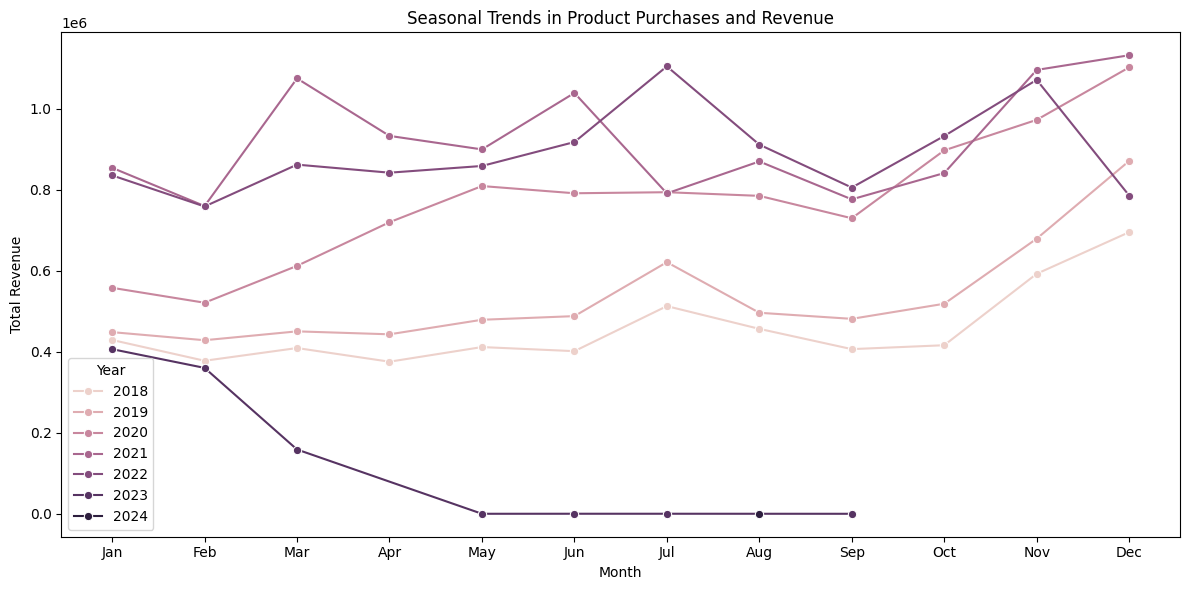

In [34]:
# Seasonal Trends in Product Purchases and Their Impact on Revenue

from pyspark.sql.functions import year, month, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month
merged_data = merged_data.withColumn("Year", year(col("Order date")))
merged_data = merged_data.withColumn("Month", month(col("Order date")))

# Group by year and month, summing total revenue
seasonal_trends = merged_data.groupBy("Year", "Month") \
    .agg(spark_sum("Revenue").alias("Total_Revenue")) \
    .orderBy("Year", "Month")

# Convert to Pandas for visualisation
seasonal_trends_pd = seasonal_trends.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends_pd, x="Month", y="Total_Revenue", hue="Year", marker="o")
plt.title("Seasonal Trends in Product Purchases and Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

## 3.11 Customer location vs purchasing behavior <font color = red>[5 marks]</font> <br>

Examine the relationship between customer's location and their purchasing behaviors

<ipython-input-35-9bef0ce74b2b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_purchase_behavior_pd, x="Shipping Address State", y="Total_Spend", palette="viridis")


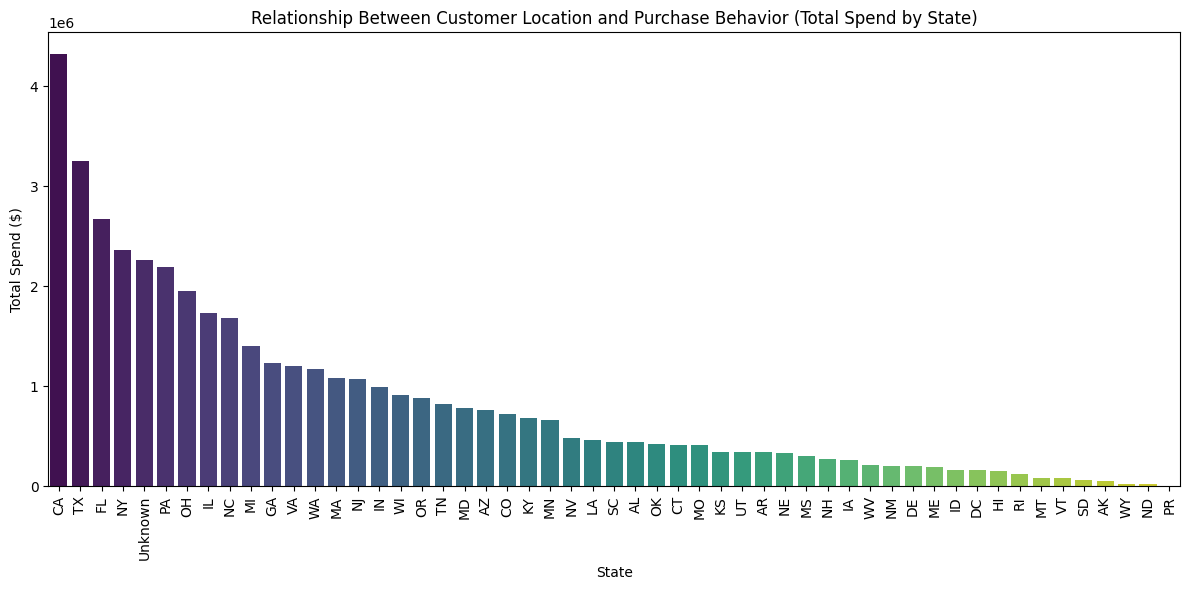

In [35]:
# Relationship Between Customer Location and Purchase Behavior

from pyspark.sql.functions import sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Group purchases by state and total spend
state_purchase_behavior = merged_data.groupBy("Shipping Address State") \
    .agg(spark_sum("Revenue").alias("Total_Spend")) \
    .orderBy(col("Total_Spend").desc())

# Convert to Pandas for visualisation
state_purchase_behavior_pd = state_purchase_behavior.toPandas()

# Plot revenue by state
plt.figure(figsize=(12, 6))
sns.barplot(data=state_purchase_behavior_pd, x="Shipping Address State", y="Total_Spend", palette="viridis")
plt.title("Relationship Between Customer Location and Purchase Behavior (Total Spend by State)")
plt.xlabel("State")
plt.ylabel("Total Spend ($)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#4. Customer Segmentation and Insights <font color = red>[45 marks]</font> <br>


## 4.1 Perform RFM Analysis <font color = red>[10 marks]</font> <br>

RFM Analysis is a powerful customer segmentation technique used to evaluate and quantify customer value based on three key dimensions:
- **Recency**,
- **Frequency**,
- **Monetary**.

This method is particularly effective in identifying high-value customers, optimizing marketing strategies, and improving customer retention in the e-commerce industry.


### 1. Recency (R)
Recency measures how recently a customer made a purchase Customers who have purchased more recently are more likely to respond to promotions and offers.
- **Application:** By ranking customers based on the number of days since their last transaction, you can prioritize those who are most engaged.

### 2. Frequency (F)
Frequency counts the number of purchases a customer has made over a given period.
Frequent purchasers tend to be more loyal and are often a source of recurring revenue.
- **Application:** Analyzing purchase frequency helps in identifying consistent buyers and understanding their buying patterns.

### 3. Monetary (M)
Monetary value represents the total amount of money a customer has spent.
Customers who spend more are often more profitable, making them ideal targets for retention and upsell strategies.
- **Application:** By assessing the monetary contribution, you can distinguish between high-value and low-value customers.


### Prepare data for RFM Analysis <font color = red>[2 marks]</font> <br>


In [36]:
from pyspark.sql.functions import datediff, max, count, sum, lit

# Get the latest order date in the dataset
latest_date = merged_data.select(max("Order date")).first()[0]

# Calculate RFM metrics
rfm_data = merged_data.groupBy("Survey ResponseID") \
    .agg(
        datediff(lit(latest_date), max("Order date")).alias("Recency"),
        countDistinct("ASIN/ISBN (Product Code)").alias("Frequency"),
        sum("Purchase price per unit").alias("Monetary")
    )

# Filter out customers with no purchases
rfm_data = rfm_data.filter(col("Frequency") > 0)

# Show RFM data
rfm_data.show(5)

+-----------------+-------+---------+------------------+
|Survey ResponseID|Recency|Frequency|          Monetary|
+-----------------+-------+---------+------------------+
|R_1jO4s7oht3pyKEc|    518|      564|12975.219999999947|
|R_1esG9Jlh9NISLaO|    529|      347| 6814.449999999986|
|R_297dOANqCntVXou|    600|      541|11097.629999999965|
|R_10TV1zyi4yCEEkl|    525|     1051| 29335.50999999992|
|R_2cmFD4NTF42JLfH|    577|      408|13507.329999999965|
+-----------------+-------+---------+------------------+
only showing top 5 rows



In [37]:
from pyspark.sql.functions import log1p
from sklearn.preprocessing import StandardScaler

# Apply log transformation to skewed features
rfm_data = rfm_data.withColumn("Recency_log", log1p(col("Recency"))) \
                   .withColumn("Frequency_log", log1p(col("Frequency"))) \
                   .withColumn("Monetary_log", log1p(col("Monetary")))

# Convert to Pandas DataFrame (for scikit-learn compatibility)
rfm_pd = rfm_data.select("Recency_log", "Frequency_log", "Monetary_log").toPandas()

# Scale features using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_pd)

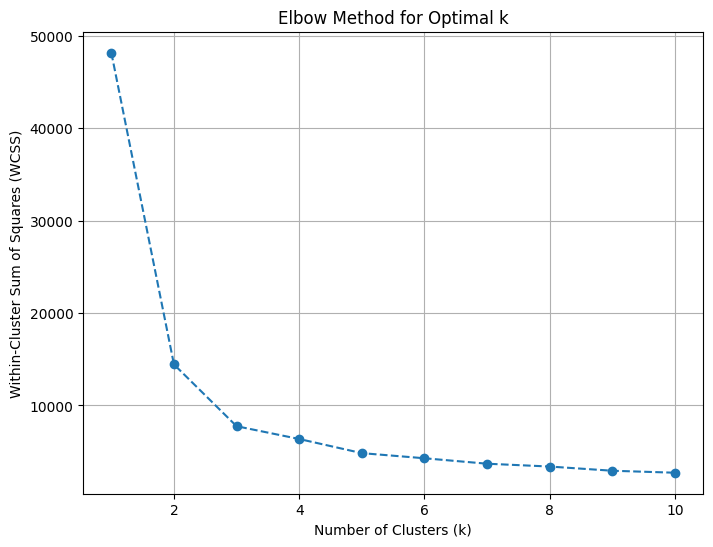

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the Within-Cluster Sum of Squares (WCSS)
wcss = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)


# Plot the elbow curve with the number of clusters on the x-axis and WCSS on the y-axis
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [39]:
# Fit the K-Means model using the optimal number of clusters obtained after understanding the elblow plot

# Add the assigned cluster labels to the Pandas DataFrame and convert back to PySpark if needed
from sklearn.cluster import KMeans

# Assuming you've determined the optimal k from the elbow plot (e.g., k=4)
optimal_k = 4  # Replace with your chosen k value

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_scaled)

# Add cluster labels to the Pandas DataFrame
rfm_pd['Cluster'] = kmeans.labels_

# Convert back to PySpark DataFrame (if needed)
# Import necessary libraries
from pyspark.sql import SparkSession
# Create a SparkSession (if not already created)
spark = SparkSession.builder.appName("RFMAnalysis").getOrCreate()
# Convert Pandas DataFrame to PySpark DataFrame
rfm_data_with_clusters = spark.createDataFrame(rfm_pd)
rfm_data_with_clusters.show(5)

+-----------------+------------------+------------------+-------+
|      Recency_log|     Frequency_log|      Monetary_log|Cluster|
+-----------------+------------------+------------------+-------+
|6.251903883165888| 6.336825731146441| 9.470873730588778|      0|
|6.272877006546167|5.8522024797744745| 8.826947372765073|      0|
|6.398594934535208| 6.295266001439646| 9.314576956259701|      0|
| 6.26530121273771|6.9584483932976555|10.286588094383248|      0|
|6.359573868672378| 6.013715156042802| 9.511061811174475|      0|
+-----------------+------------------+------------------+-------+
only showing top 5 rows



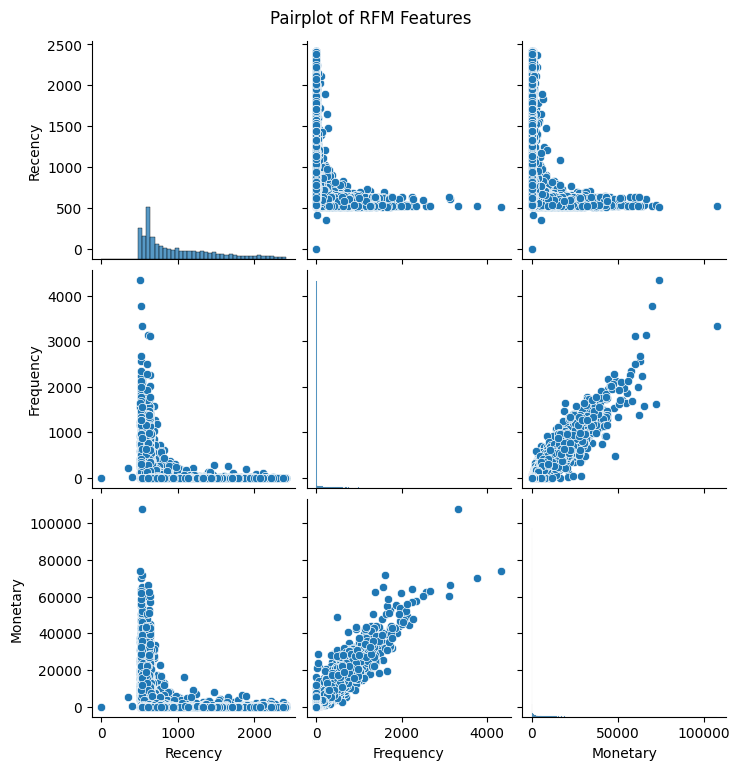

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the full RFM dataset from PySpark DataFrame to Pandas DataFrame for visualisation
rfm_pd_full = rfm_data.toPandas() # Assuming 'rfm_data' is your original PySpark RFM DataFrame

# Generate a pairplot to visualise the relationships between the numeric RFM columns
sns.pairplot(rfm_pd_full[['Recency', 'Frequency', 'Monetary']])  # Select the RFM columns
plt.suptitle('Pairplot of RFM Features', y=1.02)  # Add a title
plt.show()

### Behavioral Trends Analysis <font color = red>[8 marks]</font> <br>

Perform RFM analysis to study the behavior of customers to tailor marketing strategies

In [41]:
# Import necessary PySpark functions for data processing
from pyspark.sql.functions import datediff, max, countDistinct, sum, lit
from pyspark.sql.functions import col  # Import col for column selection

# Group the dataset by 'Survey ResponseID' to calculate RFM metrics
rfm_data = merged_data.groupBy("Survey ResponseID") \
    .agg(
        datediff(lit(latest_date), max("Order date")).alias("Recency"),
        countDistinct("ASIN/ISBN (Product Code)").alias("Frequency"),
        sum("Purchase price per unit").alias("Monetary")
    )

# Normalize the distributions (apply log transformation if needed)
# You might need to adjust the log transformation based on data distribution
from pyspark.sql.functions import log1p
rfm_data = rfm_data.withColumn("Recency_log", log1p(col("Recency"))) \
                   .withColumn("Frequency_log", log1p(col("Frequency"))) \
                   .withColumn("Monetary_log", log1p(col("Monetary")))


# Convert the processed RFM dataset back to Pandas for sklearn compatibility
rfm_pd = rfm_data.select("Recency_log", "Frequency_log", "Monetary_log").toPandas()

In [42]:
# Apply K-Means clustering
from sklearn.cluster import KMeans
from pyspark.sql import SparkSession

# Assuming you have determined the optimal k (e.g., k=4) from the elbow method
optimal_k = 4  # Replace with your chosen k value

# Fit the K-Means model and predict cluster labels
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_pd)  # Predict cluster labels

# Add the predicted cluster labels to the Pandas DataFrame
rfm_pd['Cluster'] = cluster_labels

# Convert the Pandas DataFrame back to a PySpark DataFrame
spark = SparkSession.builder.appName("RFMClustering").getOrCreate()
rfm_data_with_clusters = spark.createDataFrame(rfm_pd)
rfm_data_with_clusters.show(5)

+-----------------+------------------+------------------+-------+
|      Recency_log|     Frequency_log|      Monetary_log|Cluster|
+-----------------+------------------+------------------+-------+
|6.251903883165888| 6.336825731146441| 9.470873730588778|      2|
|6.272877006546167|5.8522024797744745| 8.826947372765073|      2|
|6.398594934535208| 6.295266001439646| 9.314576956259701|      2|
| 6.26530121273771|6.9584483932976555|10.286588094383248|      2|
|6.359573868672378| 6.013715156042802| 9.511061811174475|      2|
+-----------------+------------------+------------------+-------+
only showing top 5 rows



Analyse the Cluster Distribution by Income <font color = red>[2 marks]</font> <br>


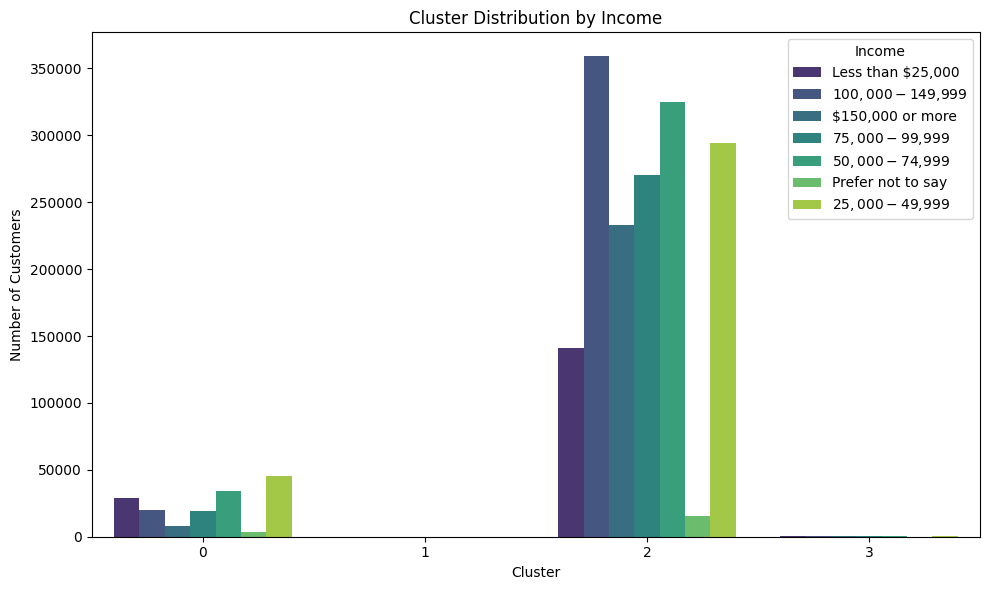

In [46]:
# Trend 1: Cluster Distribution by Income

from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns

# Join the RFM dataset with the survey dataset using a common key
# Include 'Survey ResponseID' when converting to Pandas DataFrame
rfm_pd = rfm_data.select("Survey ResponseID", "Recency_log", "Frequency_log", "Monetary_log").toPandas()

# Apply K-Means clustering and add cluster labels to rfm_pd (same as before)
from sklearn.cluster import KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_pd[['Recency_log', 'Frequency_log', 'Monetary_log']])
rfm_pd['Cluster'] = cluster_labels

# Convert back to PySpark DataFrame, now with 'Survey ResponseID'
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("RFMClustering").getOrCreate()
rfm_data_with_clusters = spark.createDataFrame(rfm_pd)

# Now perform the join
cluster_income_distribution = rfm_data_with_clusters.join(
    merged_data.select("Survey ResponseID", "Q-demos-income"),
    on="Survey ResponseID",
    how="inner"
)

# Aggregate data to count the number of customers per Cluster-Income group
cluster_income_counts = cluster_income_distribution.groupBy("Cluster", "Q-demos-income") \
    .agg(count("*").alias("CustomerCount"))

# Convert the aggregated data from PySpark DataFrame to Pandas DataFrame for visualisation
cluster_income_pd = cluster_income_counts.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="CustomerCount", hue="Q-demos-income", data=cluster_income_pd, palette="viridis")
plt.title("Cluster Distribution by Income")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

Analyse the Average Spending by Cluster <font color = red>[2 marks]</font> <br>


<ipython-input-47-142b860a4962>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Avg_Monetary", data=cluster_spending_pd, palette="viridis")


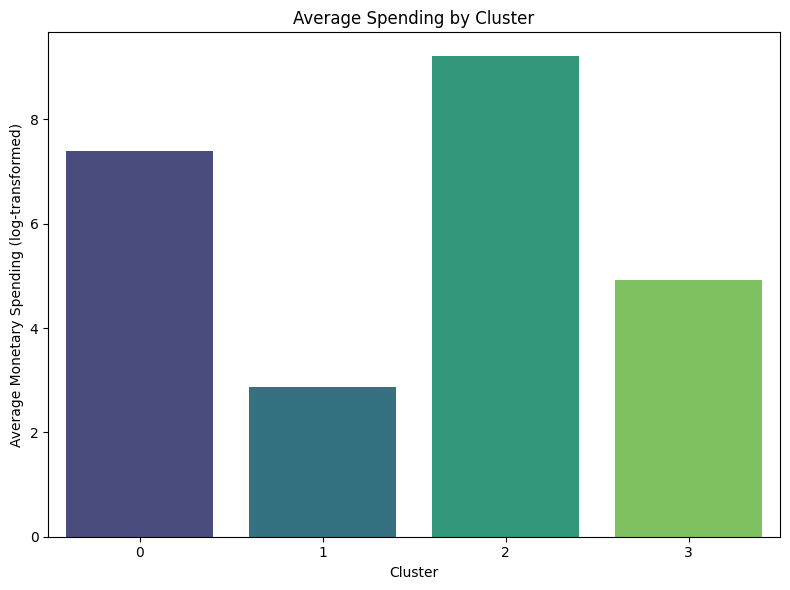

In [47]:
#Trend 2: Average Spending by Cluster

# Import the required function for calculating averages in PySpark
from pyspark.sql.functions import avg

# Compute the average values of 'Recency_log', 'Frequency', and 'Monetary_log' for each customer cluster
cluster_spending = rfm_data_with_clusters.groupBy("Cluster") \
    .agg(
        avg("Recency_log").alias("Avg_Recency"),
        avg("Frequency_log").alias("Avg_Frequency"),
        avg("Monetary_log").alias("Avg_Monetary")  # Average monetary spending
    )

# Convert the aggregated cluster summary from PySpark DataFrame to Pandas DataFrame for visualisation
cluster_spending_pd = cluster_spending.toPandas()

# Generate a bar plot to visualise the average monetary spending per cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Avg_Monetary", data=cluster_spending_pd, palette="viridis")
plt.title("Average Spending by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Monetary Spending (log-transformed)")
plt.tight_layout()
plt.show()

Analyse the Purchase Frequency vs. Recency <font color = red>[2 marks]</font> <br>


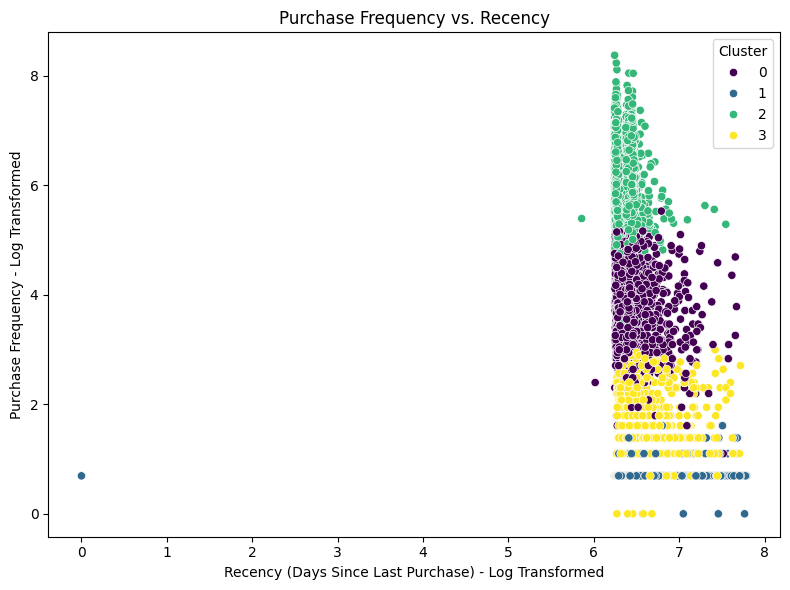

In [51]:
# Trend 3: Purchase Frequency vs. Recency

# Use the DataFrame that includes the 'Cluster' column
# Use 'Recency_log' and 'Frequency_log' instead of 'Recency' and 'Frequency'
rfm_pd_with_clusters = rfm_data_with_clusters.select("Recency_log", "Frequency_log", "Cluster").toPandas()

# Generate a scatter plot to analyse the relationship between Purchase Frequency and Recency
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Update the scatterplot to use the correct column names
sns.scatterplot(x="Recency_log", y="Frequency_log", data=rfm_pd_with_clusters, hue="Cluster", palette="viridis")
plt.title("Purchase Frequency vs. Recency")
plt.xlabel("Recency (Days Since Last Purchase) - Log Transformed")  # Update x-axis label
plt.ylabel("Purchase Frequency - Log Transformed")  # Update y-axis label
plt.tight_layout()
plt.show()

Analyse the top categories by clusters <font color = red>[2 marks]</font> <br>


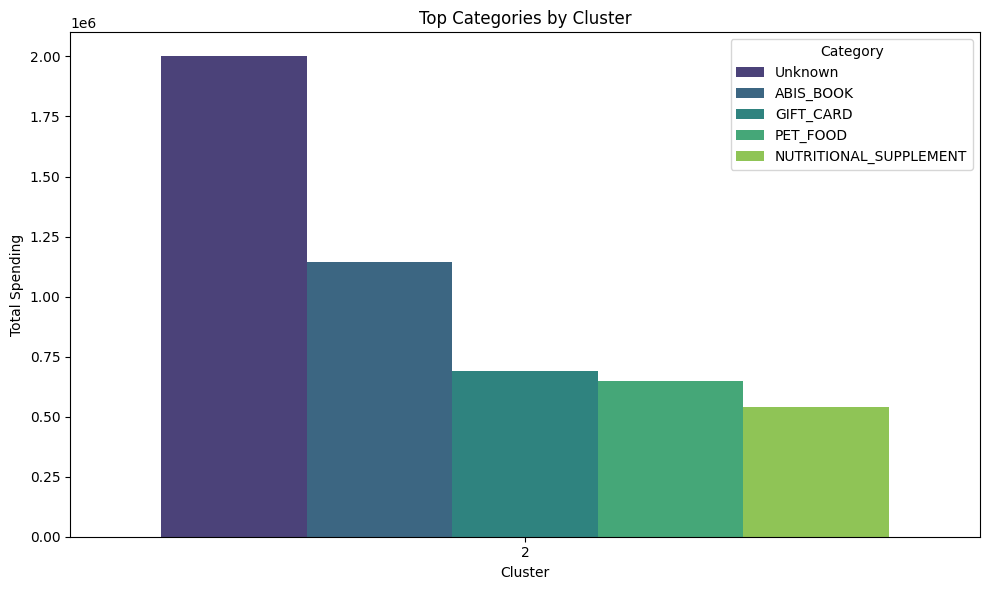

In [52]:
#Trend 4: Top Categories by Cluster

# Import the necessary function to calculate the sum in PySpark
from pyspark.sql.functions import sum as spark_sum

# Join the merged dataset with the RFM dataset to associate each customer with their respective cluster
cluster_category_data = merged_data.join(rfm_data_with_clusters, on="Survey ResponseID", how="inner")

# Group the filtered data by 'Category' and compute the total spending in each category
category_spending = cluster_category_data.groupBy("Cluster", "Category") \
    .agg(spark_sum("Purchase price per unit").alias("Total_Spending"))

# Order the categories by total spending in descending order and select the top 5 highest spending categories
top_categories = category_spending.orderBy(col("Total_Spending").desc()).limit(5)

# Convert the top categories dataset from PySpark DataFrame to Pandas DataFrame for visualisation
top_categories_pd = top_categories.toPandas()

# Plot the cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Total_Spending", hue="Category", data=top_categories_pd, palette="viridis")
plt.title("Top Categories by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Spending")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

## 4.2 Insights <font color = red>[35 marks]</font> <br>


### 4.2.1 When to schedule effective promotions. <font color = red>[3 marks]</font> <br>

Compare sales across weekdays to schedule effective promotions

<ipython-input-53-f3f810ab14c0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DayOfWeek", y="TotalSales", data=weekday_sales_pd, palette="viridis")


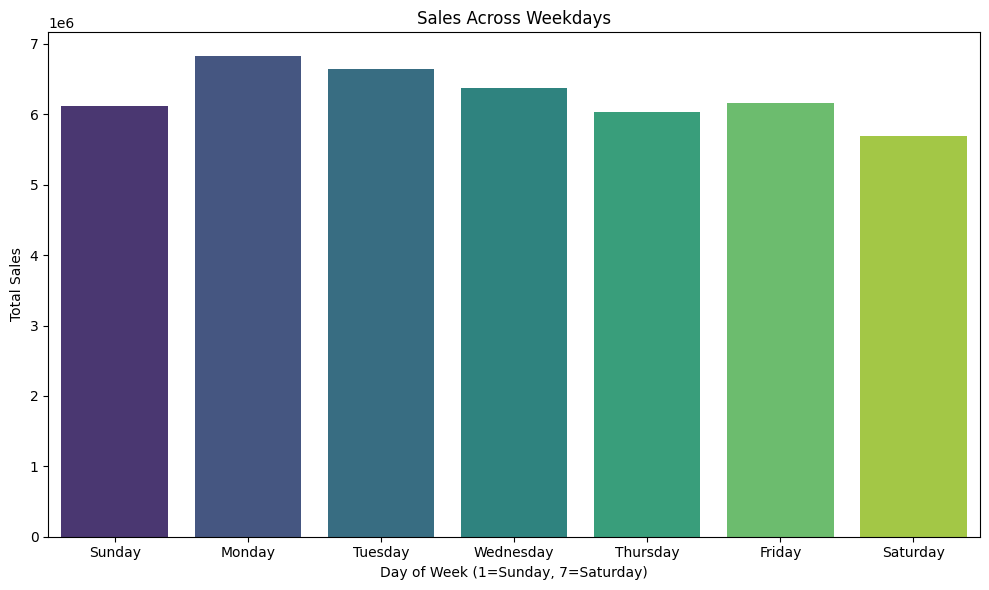

In [53]:
#Compare sales across weekdays to schedule effective promotions

from pyspark.sql.functions import dayofweek, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Extract day of the week (1 = Sunday, 7 = Saturday)
merged_data = merged_data.withColumn("DayOfWeek", dayofweek("Order date"))

# Group by weekday and sum total sales (using 'Revenue' column)
weekday_sales = merged_data.groupBy("DayOfWeek") \
    .agg(spark_sum("Revenue").alias("TotalSales")) \
    .orderBy("DayOfWeek")

# Convert to Pandas for visualisation
weekday_sales_pd = weekday_sales.toPandas()

# Plot sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x="DayOfWeek", y="TotalSales", data=weekday_sales_pd, palette="viridis")
plt.title("Sales Across Weekdays")
plt.xlabel("Day of Week (1=Sunday, 7=Saturday)")
plt.ylabel("Total Sales")
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']) # Set custom x-axis labels for clarity
plt.tight_layout()
plt.show()

# Insights for scheduling promotions:
# Observe the days with lower sales (e.g., weekdays) and consider scheduling promotions
# on those days to potentially boost sales.
# Days with higher sales (e.g., weekends) might already have good customer engagement.
# You can target specific customer segments with promotions based on their RFM analysis clusters.

### 4.2.2 Top-selling Products <font color = red>[2 marks]</font> <br>

Identify top-selling products by considering revenue and engagement metrics

<ipython-input-54-c47ae1021885>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalRevenue", y="Title", data=top_10_products_pd, palette="viridis")
<ipython-input-54-c47ae1021885>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


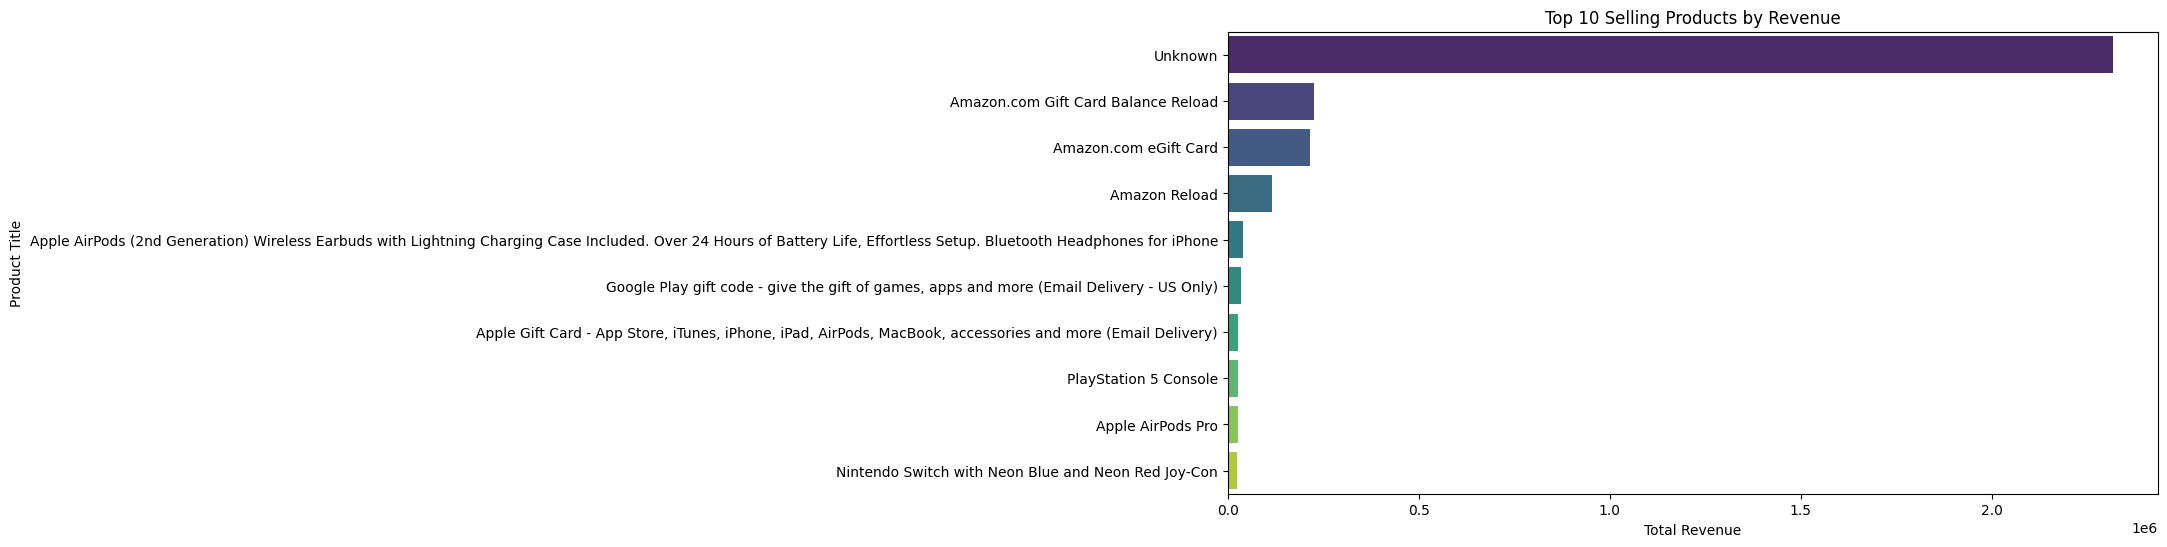

In [54]:
#Identify top-selling products using revenue and engagement metrics
from pyspark.sql.functions import sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product and sum revenue
product_revenue = merged_data.groupBy("Title") \
    .agg(spark_sum("Revenue").alias("TotalRevenue")) \
    .orderBy(col("TotalRevenue").desc())

# Get top 10 products by revenue
top_10_products = product_revenue.limit(10)

# Convert to Pandas for visualization
top_10_products_pd = top_10_products.toPandas()

# Plot top products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x="TotalRevenue", y="Title", data=top_10_products_pd, palette="viridis")
plt.title("Top 10 Selling Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

### 4.2.3 State-wise revenue Distribution <font color = red>[5 marks]</font> <br>

Assess state-wise revenue to focus on high-growth areas

<ipython-input-55-60ee19f2f837>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Shipping Address State", y="TotalRevenue", data=state_revenue_pd, palette="viridis")


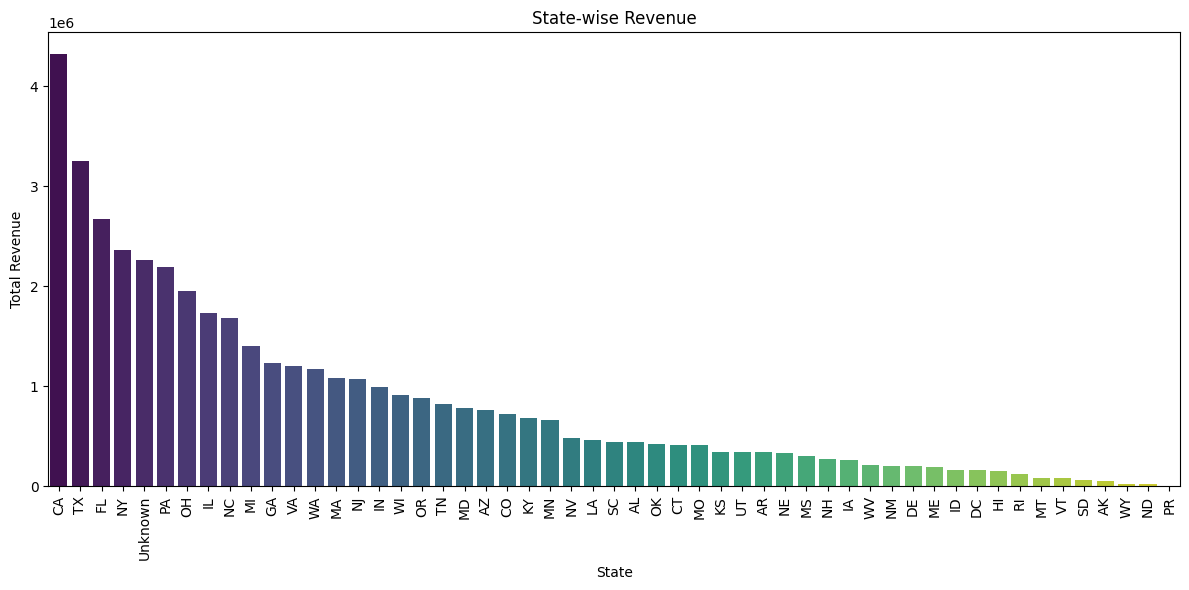

In [55]:
#Assess state-wise revenue to focus on high-growth areas
from pyspark.sql.functions import sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and sum revenue
state_revenue = merged_data.groupBy("Shipping Address State") \
    .agg(spark_sum("Revenue").alias("TotalRevenue")) \
    .orderBy(col("TotalRevenue").desc())

# Convert to Pandas for visualization
state_revenue_pd = state_revenue.toPandas()

# Plot revenue by state
plt.figure(figsize=(12, 6))
sns.barplot(x="Shipping Address State", y="TotalRevenue", data=state_revenue_pd, palette="viridis")
plt.title("State-wise Revenue")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Identifying high-growth areas:
# Look for states with significantly higher revenue compared to others.
# Consider factors like population density and market size for a comprehensive analysis.
# You can further segment customers within high-revenue states using RFM analysis
# to target specific groups.

### 4.2.4 Repeat Purchase Behavior <font color = red>[5 marks]</font> <br>

Examine repeat purchase behavior to enhance retention initiatives.

In [56]:
#Examine repeat purchase behavior to enhance retention initiatives

from pyspark.sql.functions import count, col

# Count total purchases per customer
customer_purchases = merged_data.groupBy("Survey ResponseID") \
    .agg(count("*").alias("TotalPurchases"))

# Filter for repeat customers (those with more than one purchase)
repeat_customers = customer_purchases.filter(col("TotalPurchases") > 1)

# Show sample data
repeat_customers.show(5)

# Further Analysis for Retention Initiatives:
# Calculate the average purchase frequency of repeat customers.
# Segment repeat customers using RFM analysis to understand their value and behavior.
# Design targeted retention campaigns based on customer segments (e.g., loyalty programs,
# personalized offers, early access to new products).
# Analyze the time between purchases to predict when customers are likely to make their next purchase.

+-----------------+--------------+
|Survey ResponseID|TotalPurchases|
+-----------------+--------------+
|R_10TV1zyi4yCEEkl|          1124|
|R_1mxX9jjBSLwxiDU|           248|
|R_297dOANqCntVXou|           588|
|R_2cmFD4NTF42JLfH|           447|
|R_1QgWXnlpERvWjrY|            89|
+-----------------+--------------+
only showing top 5 rows



### 4.2.5 Flagging Potential Fraud <font color = red>[5 marks]</font> <br>

Identify irregular transaction patterns to flag potential fraud.

In [57]:
#Identify irregular transaction patterns to flag potential fraud

from pyspark.sql.functions import col, avg, stddev

# Calculate average and standard deviation of spending
spending_stats = merged_data.select(avg(col("Revenue")).alias("avg_spending"),
                                   stddev(col("Revenue")).alias("stddev_spending")) \
                            .collect()[0]  # Collect as a single row

avg_spending = spending_stats["avg_spending"]
stddev_spending = spending_stats["stddev_spending"]

# Calculate the threshold for unusually high spending
# Consider spending to be unusually high if the total spent is greater than the mean + 3 * std dev
threshold = avg_spending + (3 * stddev_spending)

# Filter transactions that exceed the threshold
suspicious_transactions = merged_data.filter(col("Revenue") > threshold)

# Show suspicious transactions
suspicious_transactions.show(5)  # Display a sample of suspicious transactions

# Further Analysis and Actions:
# Investigate the flagged transactions for

+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+------------------+-------------+----------------+--------------------+--------------------+-------------------+--------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------------+--------------------+--------------------+---------------+------------+------------------+----------+-----------+------+------+---------+-------+-------+----+-----+
|Survey ResponseID|Order date|Purchase price per unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|          Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|   Q-demos-education|     Q-demos-income|Q-demos-gender|Q-sexual-orientation| Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|

### 4.2.6 Demand Variations across product categories <font color = red>[5 marks]</font> <br>

Perform inventory management by monitoring demand variations across product categories.

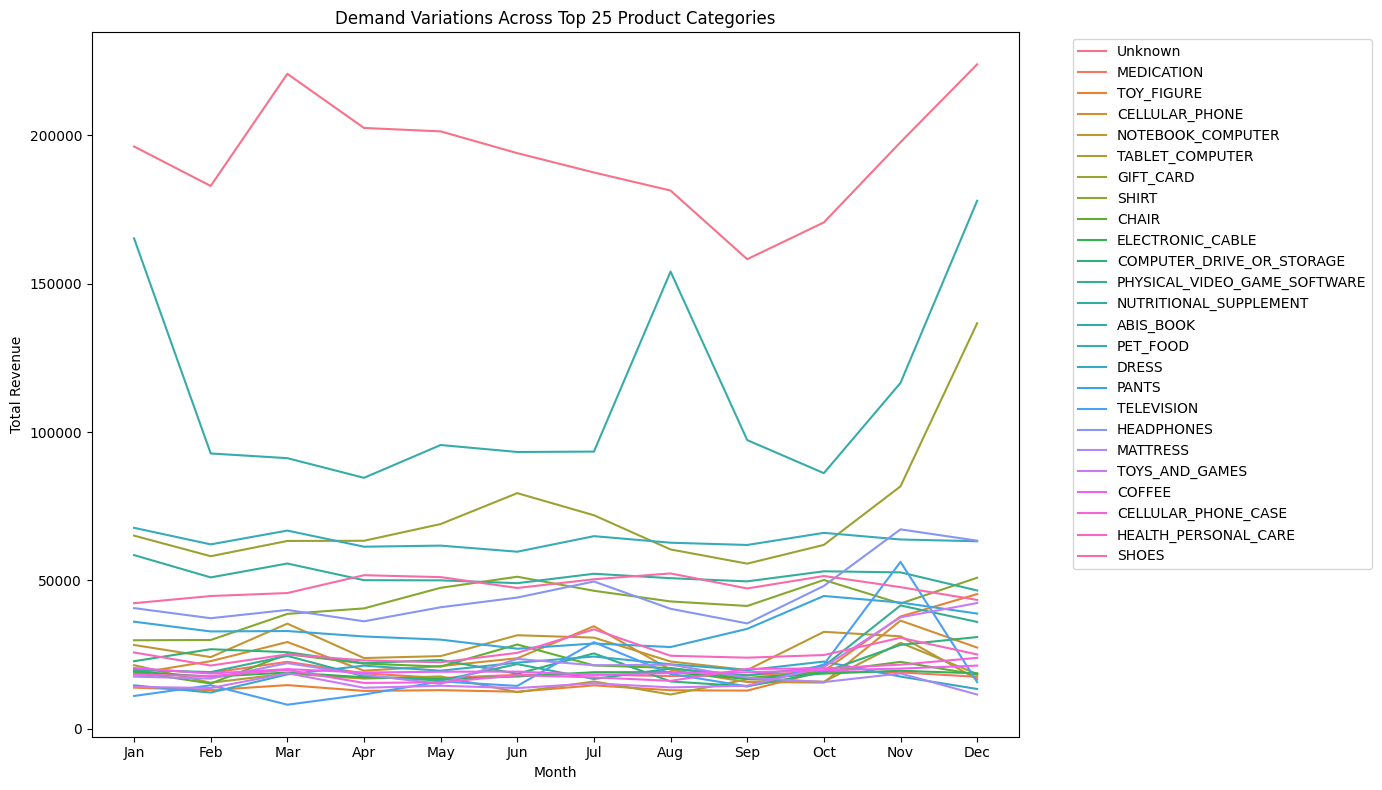

In [58]:
#Monitor demand variations across product categories (Top 25) for inventory management

from pyspark.sql.functions import col, sum as spark_sum, month
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category and month, summing total revenue
category_trends = merged_data.groupBy("Category", month("Order date").alias("Month")) \
    .agg(spark_sum("Revenue").alias("TotalRevenue"))

# Compute total revenue per category
category_total_revenue = category_trends.groupBy("Category") \
    .agg(spark_sum("TotalRevenue").alias("TotalCategoryRevenue"))

# Get the top 25 categories by total revenue
top_25_categories = category_total_revenue.orderBy(col("TotalCategoryRevenue").desc()).limit(25)

# Filter category_trends to include only top 25 categories
filtered_category_trends = category_trends.join(top_25_categories, on="Category", how="inner")

# Convert to Pandas for visualisation
filtered_category_trends_pd = filtered_category_trends.toPandas()

# Plot revenue trends for top 25 categories
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_category_trends_pd, x="Month", y="TotalRevenue", hue="Category")
plt.title("Demand Variations Across Top 25 Product Categories")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

# Insights for inventory management:
# Observe the seasonal trends for each category to anticipate demand fluctuations.
# Identify categories with consistent high demand to ensure sufficient inventory.
# Categories with erratic demand might require more flexible inventory management strategies.

### 4.2.7 Assess how bulk purchases affect revenue and supply chain operations <font color = red>[5 marks]</font> <br>

Analyse the impact of how bulk purchasing behavior affects revenue and the overall supply chain operations.

<ipython-input-59-51394825ab0b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalRevenue", y="Category", data=top_25_bulk_categories_pd, palette="viridis")


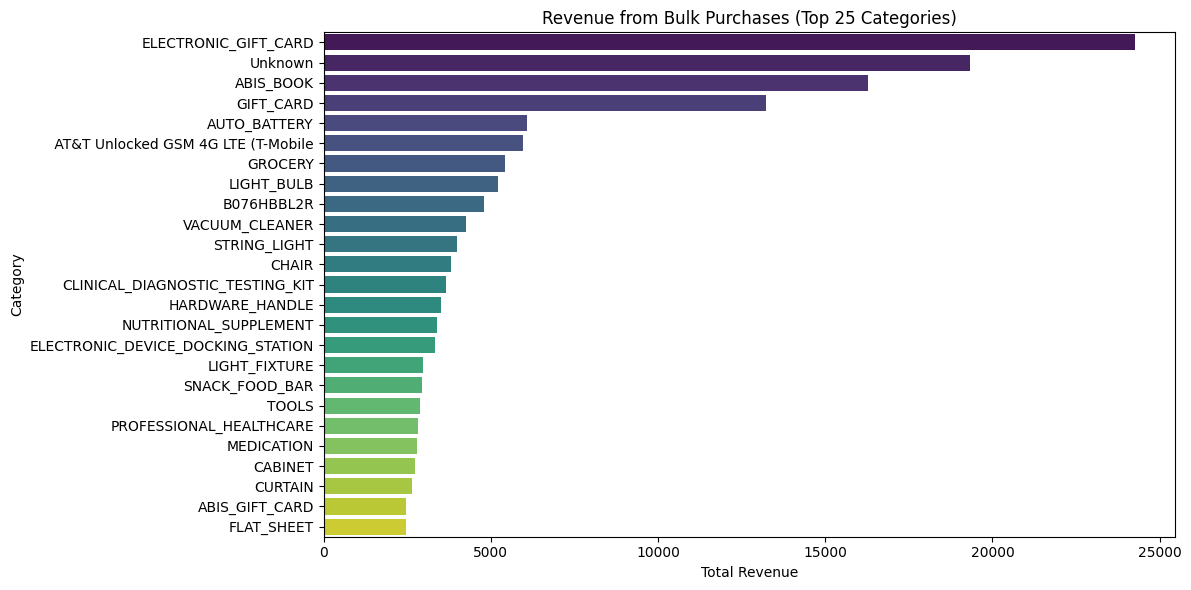

In [59]:
#Assess how bulk purchases affect revenue and supply chain operations
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

# Filter bulk purchases (Quantity > 5) and compute total revenue per category
bulk_purchases = merged_data.filter(col("Quantity") > 5) \
    .groupBy("Category") \
    .agg(spark_sum("Revenue").alias("TotalRevenue"))

# Select the top 25 categories by total revenue
top_25_bulk_categories = bulk_purchases.orderBy(col("TotalRevenue").desc()).limit(25)

# Convert to Pandas for visualization
top_25_bulk_categories_pd = top_25_bulk_categories.toPandas()

# Plot revenue from bulk purchases (Top 25 categories)
plt.figure(figsize=(12, 6))
sns.barplot(x="TotalRevenue", y="Category", data=top_25_bulk_categories_pd, palette="viridis")
plt.title("Revenue from Bulk Purchases (Top 25 Categories)")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Insights for supply chain operations:
# Identify categories with high revenue from bulk purchases, indicating potential
# strain on inventory and logistics.
# Consider optimizing supply chain processes for these categories, such as:
# - Implementing bulk discounts or pricing strategies.
# - Adjusting inventory levels to accommodate bulk orders.
# - Streamlining logistics and warehousing for efficient handling of bulk shipments.
# - Forecasting bulk purchase trends to proactively manage inventory and resources.

### 4.2.8 Compare lifecycle strategies <font color = red>[5 marks]</font> <br>

Compare new and established products to inform and compare lifecycle strategies to make informed decisions.

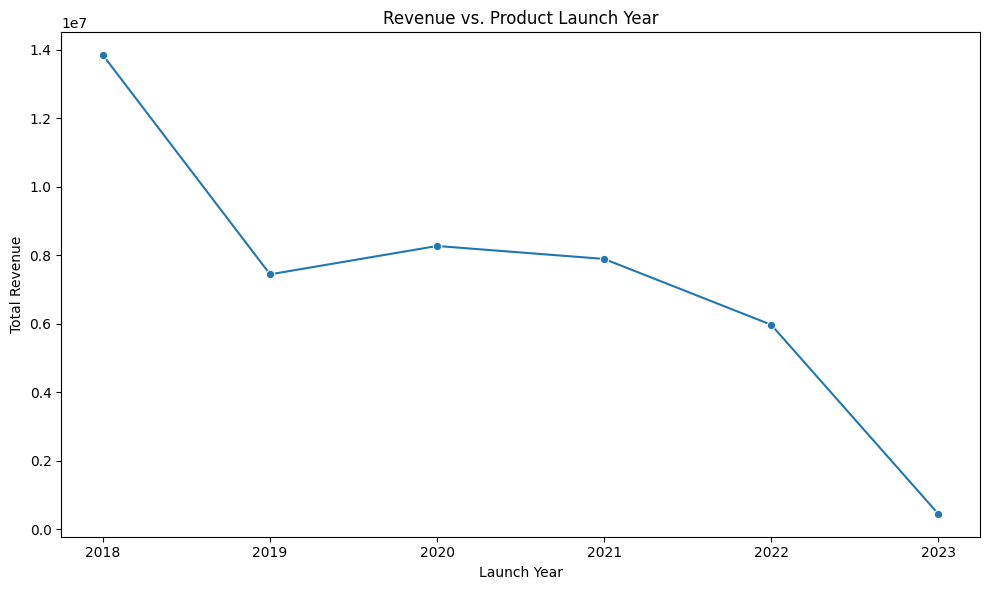

In [60]:
#Compare new and established products to inform lifecycle strategies

from pyspark.sql.functions import min, sum as spark_sum, year
import matplotlib.pyplot as plt
import seaborn as sns

# Compute "Launch Year" as the first recorded sale year for each product
launch_year = merged_data.groupBy("Title") \
    .agg(min(year(col("Order date"))).alias("LaunchYear"))

# Join this back to the main dataset
merged_data_with_launch_year = merged_data.join(launch_year, on="Title", how="left")

# Now, we can compute revenue by launch year
revenue_by_launch_year = merged_data_with_launch_year.groupBy("LaunchYear") \
    .agg(spark_sum("Revenue").alias("TotalRevenue")) \
    .orderBy("LaunchYear")

# Convert to Pandas
revenue_by_launch_year_pd = revenue_by_launch_year.toPandas()

# Plot revenue vs. launch year
plt.figure(figsize=(10, 6))
sns.lineplot(x="LaunchYear", y="TotalRevenue", data=revenue_by_launch_year_pd, marker="o")
plt.title("Revenue vs. Product Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# Insights for lifecycle strategies:
# Observe the trend of revenue over product launch years.
# Identify periods of high and low revenue for new products.
# This analysis can help in:
# - Understanding product lifecycle stages (introduction, growth, maturity, decline).
# - Adjusting marketing and pricing strategies based on product age.
# - Identifying opportunities for product innovation or revitalization.
# - Managing inventory and resource allocation for new and established products.

#5 Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

Summary of Customer Behavior Analysis:

This analysis offered key insights into customer behavior, purchase patterns, and product performance in the e-commerce space. By leveraging RFM segmentation, we identified distinct customer groups for targeted marketing. Sales trends across time frames, product categories, and regions revealed areas for inventory and supply chain optimization. We also uncovered behavior differences by demographics and purchase frequency, along with insights into bulk buying, product lifecycle stages, and potential fraud.

Key Recommendations:

*   Use customer segmentation for personalized marketing.
*   Align inventory with demand patterns and seasonal trends.
*   Improve logistics for bulk orders.
*   Manage product lifecycles for innovation and efficiency.
*   Strengthen fraud detection systems.
*   Focus on customer retention through loyalty initiatives.
*   Prioritize high-performing regions and segments.

By applying these insights and continuing to monitor customer behavior, the business can boost performance, improve customer satisfaction, and support long-term growth.
